# Exploratory Data Analysis

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CO2 Emissions_Canada_cleaned.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Number of Gears
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,196,5.0
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,221,6.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,136,7.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,255,6.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,244,6.0


In [3]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (6282, 12)


In [4]:
print(df.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
CO2 Emissions(g/km)                   int64
Number of Gears                     float64
dtype: object


Cylinders and Number of Gears are categorical variables.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6282 entries, 0 to 6281
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  CO2 Emissions(g/km)               6282 non-null   int64  
 11  Number of Gears                   6041 non-null   float64
dtypes: flo

## Numerical Data

We first look at the numerical data: 
> Engine Size(L)  
> Fuel Consumption City (L/100 km)  
> Fuel Consumption Hwy (L/100 km)  
> Fuel Consumption Comb (L/100 km)      
> CO2 Emissions(g/km)   

### CO2 Emissions
Let us consider our response variable CO2 emissions. 

In [6]:
# Extract CO2 Emissions
emissions = pd.DataFrame(df['CO2 Emissions(g/km)'])
print("Data type : ", type(emissions))
print("Data dims : ", emissions.size)
emissions.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  6282


,CO2 Emissions(g/km)
0,196
1,221
2,136
3,255
4,244


In [7]:
emissions.describe()

,CO2 Emissions(g/km)
count,6282.000000
mean,251.157752
std,59.290426
min,96.000000
25%,208.000000
50%,246.000000
75%,289.000000
max,522.000000


<Axes: >

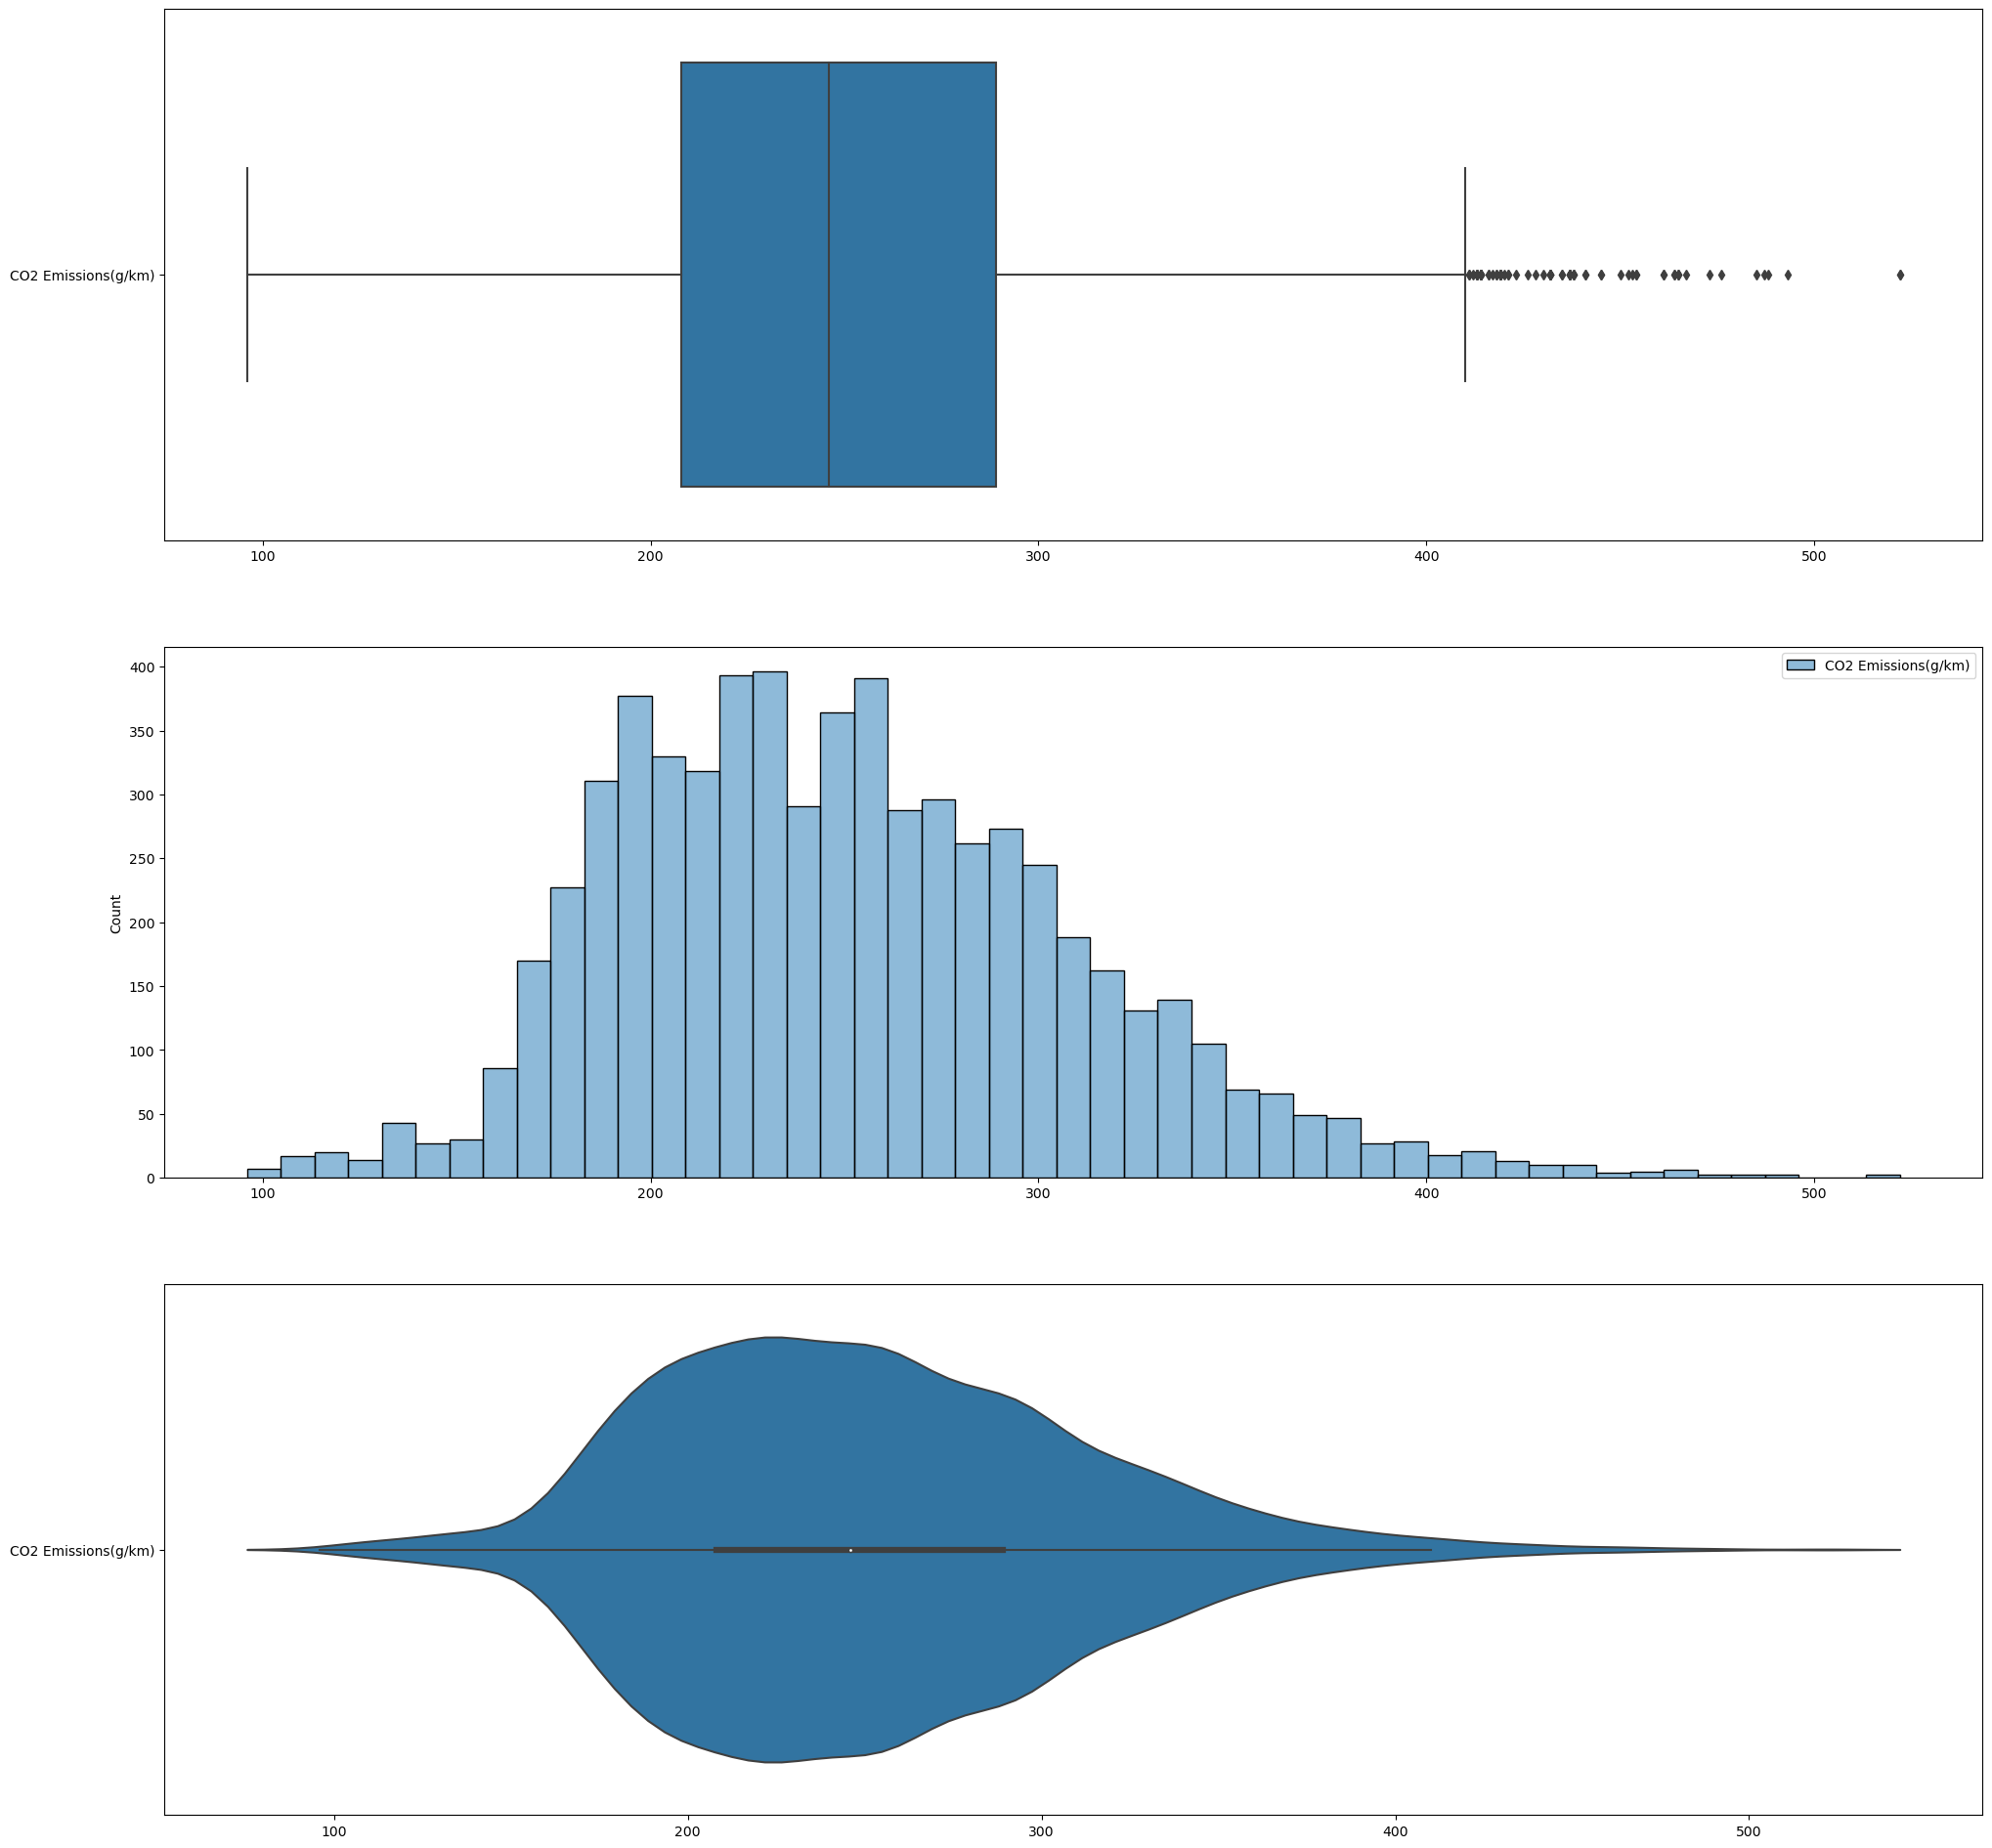

In [8]:
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = emissions, orient = "h", ax = axes[0])
sb.histplot(data = emissions,ax = axes[1])
sb.violinplot(data = emissions, orient = "h", ax = axes[2])

The graphs for CO2 Emission is skewed positive. It can be observed from the boxplot that there are some outliers beyond the upper whisker while there are no outliers below the lower whisker. 

We will remove the outliers for a cleaner dataset.

In [9]:
# Calculate quartiles and interquartile range for SalePrice
q1_Emissions = emissions.quantile(0.25)
q3_Emissions = emissions.quantile(0.75)
interquartile_range_Emissions = q3_Emissions - q1_Emissions

# Define the lower and upper whisker for SalePrice
lower_whisker_Emissions = q1_Emissions - 1.5 * interquartile_range_Emissions
upper_whisker_Emissions = q3_Emissions + 1.5 * interquartile_range_Emissions

# Filter the DataFrame to remove outliers
df_filtered = df[(df['CO2 Emissions(g/km)'] >= lower_whisker_Emissions[0]) & (df['CO2 Emissions(g/km)'] <= upper_whisker_Emissions[0])]

# Print the shape of the original and filtered DataFrame to see the changes
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)

Original DataFrame shape: (6282, 12)
Filtered DataFrame shape: (6208, 12)


<Axes: >

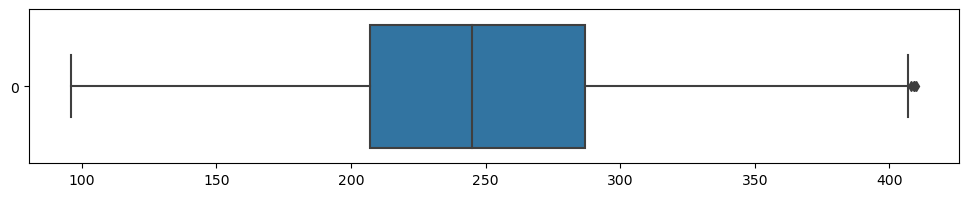

In [10]:
f, axes = plt.subplots(1,figsize=(12, 2))
sb.boxplot(data = df_filtered["CO2 Emissions(g/km)"], orient = "h")

There are still outliers even after removing values based on the interquartile range (IQR) method. Hence, we will explore another method using z-score. Z-score indicates how many standard deviations a data point is from the mean.

Original DataFrame shape: (6282, 13)
Filtered DataFrame shape: (6197, 12)


<Axes: >

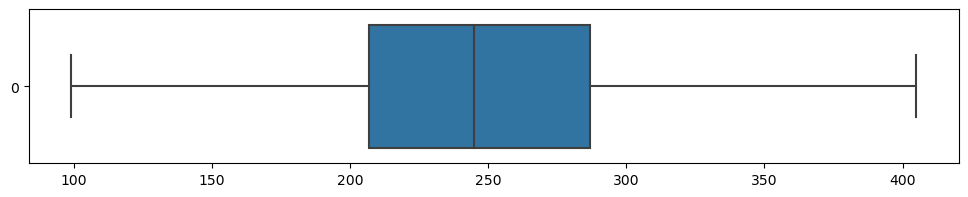

In [11]:
z_threshold = 2.6  # Adjust as needed

# Calculate mean and standard deviation
mean = df['CO2 Emissions(g/km)'].mean()
std_dev = df['CO2 Emissions(g/km)'].std()

# Calculate z-scores
df['z_score'] = (df['CO2 Emissions(g/km)'] - mean) / std_dev

# Remove outliers
df_filtered2 = df[abs(df['z_score']) <= z_threshold]

# Remove the 'z_score' column 
df_filtered2 = df_filtered2.copy()
df_filtered2.drop(columns=['z_score'], inplace=True)

# Print the shape of the original and filtered DataFrame to see the changes
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered2.shape)

f, axes = plt.subplots(1,figsize=(12, 2))
sb.boxplot(data = df_filtered2['CO2 Emissions(g/km)'], orient = "h")

### Other Numerical Variables

In [12]:
numDf = df_filtered2[['Engine Size(L)','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
numDf.head()

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244


We will look at the distributions of the numerical variables

In [13]:
numDf.describe()

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,6197.000000,6197.000000,6197.000000,6197.000000,6197.000000
mean,3.125061,12.473939,8.987817,10.905712,248.748104
std,1.332583,3.347025,2.159060,2.779428,55.579850
min,0.900000,4.200000,4.200000,4.200000,99.000000
25%,2.000000,10.100000,7.400000,8.900000,207.000000
50%,3.000000,12.000000,8.700000,10.500000,245.000000
75%,3.700000,14.500000,10.200000,12.600000,287.000000
max,8.400000,26.700000,20.500000,23.900000,405.000000


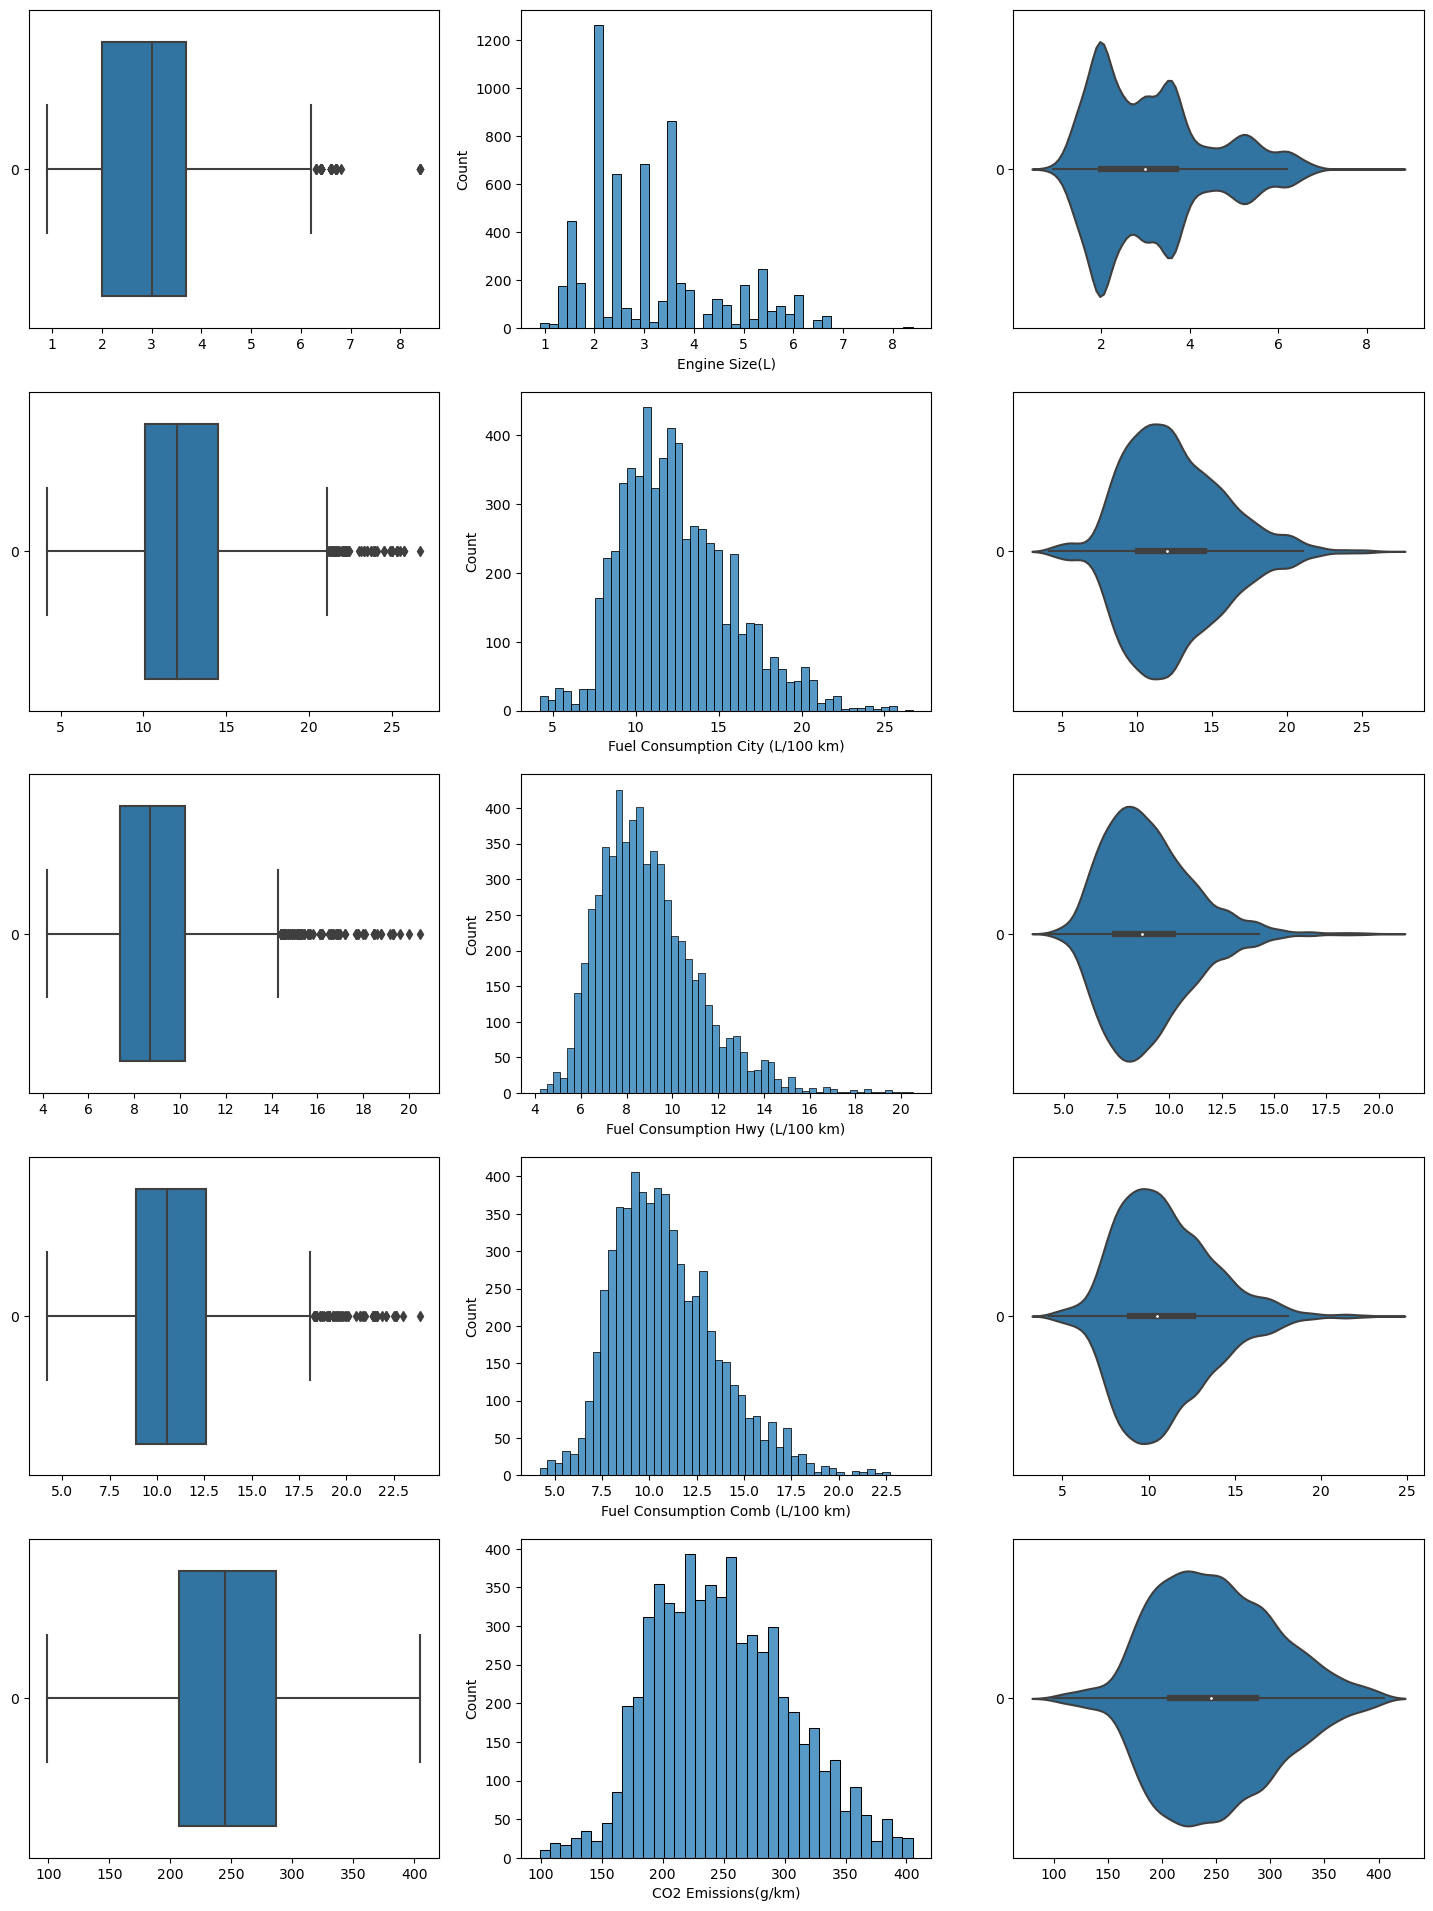

In [14]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in numDf:
    sb.boxplot(data = numDf[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDf[var], ax = axes[count,1])
    sb.violinplot(data = numDf[var], orient = "h", ax = axes[count,2])
    count += 1

In [15]:
skewness = numDf.skew()
print("Skewness for each variable:")
print(skewness)

Skewness for each variable:
Engine Size(L)                      0.820479
Fuel Consumption City (L/100 km)    0.641350
Fuel Consumption Hwy (L/100 km)     0.986925
Fuel Consumption Comb (L/100 km)    0.752311
CO2 Emissions(g/km)                 0.307624
dtype: float64


As seen from these graphs, the numerical variables are skew positive.

Now, we look at the correlation between our numerical variables.

In [16]:
# Calculate the complete  correlation matrix
numDf.corr()

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.828294,0.756542,0.813193,0.850184
Fuel Consumption City (L/100 km),0.828294,1.000000,0.947451,0.993601,0.912004
Fuel Consumption Hwy (L/100 km),0.756542,0.947451,1.000000,0.977200,0.874927
Fuel Consumption Comb (L/100 km),0.813193,0.993601,0.977200,1.000000,0.910095
CO2 Emissions(g/km),0.850184,0.912004,0.874927,0.910095,1.000000


<Axes: >

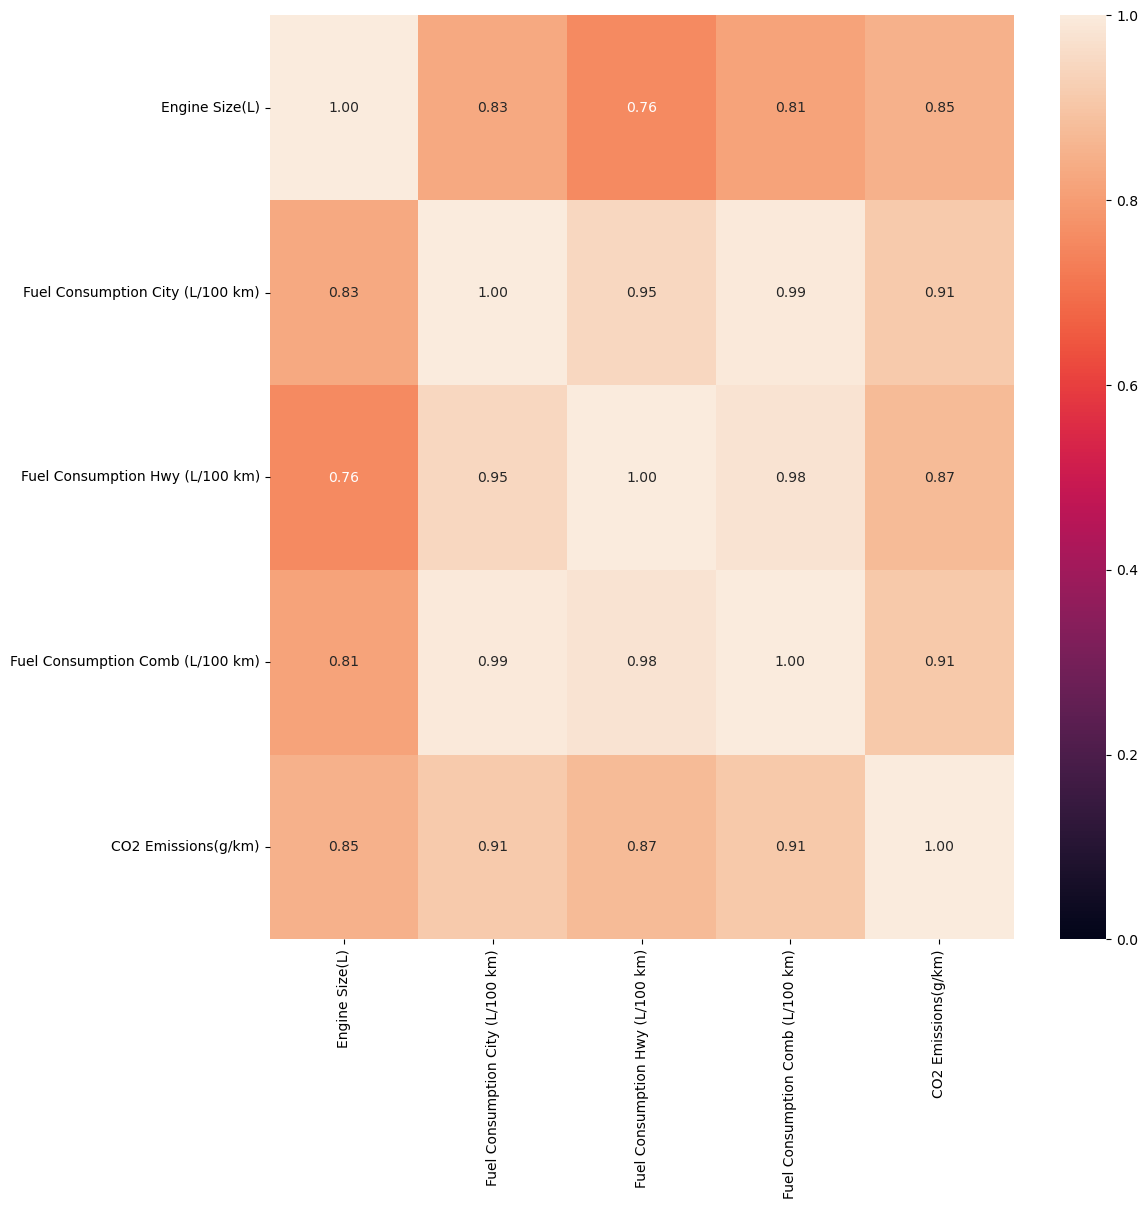

In [17]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(numDf.corr(), vmin = 0, vmax = 1, annot = True, fmt = ".2f")

From the heatmap and correlation matrix, there is a strong positive correlation between CO2 Emissions and the other numerical variables. This suggests a relatively strong linear relationship as depicted in the pairplot below. 

In addition, there is a strong positive correlation between Engine Size and Fuel Consumption City, Fuel Consumption Hwy and Fuel Consumption Comb.

/Users/chester/Documents/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


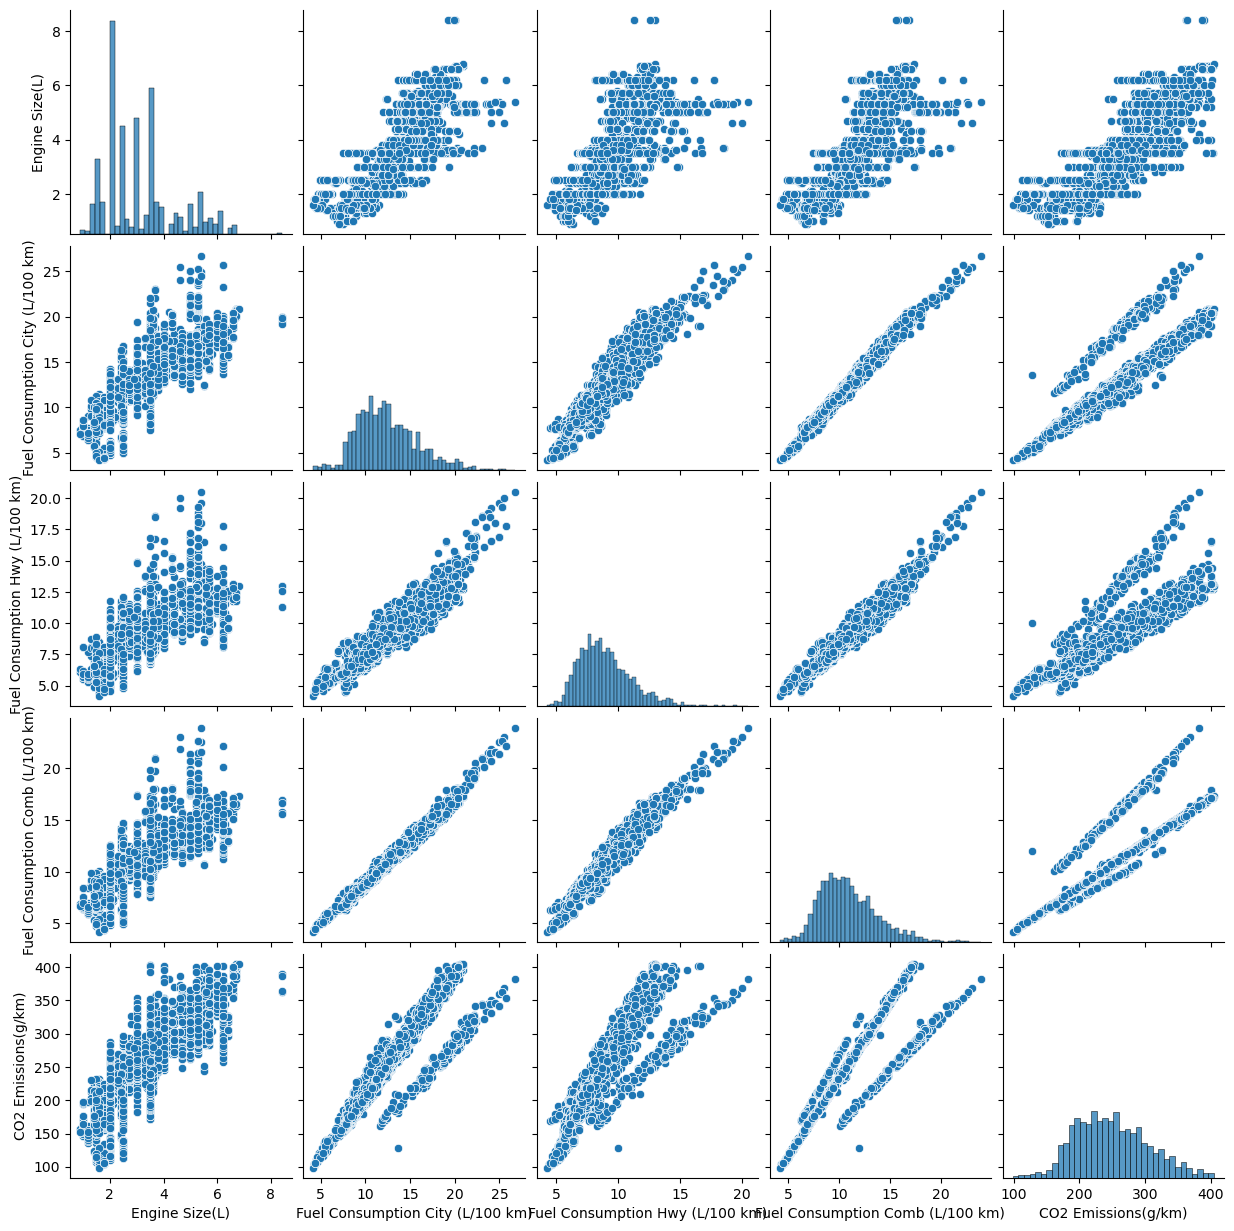

In [18]:
# Draw pairs of variables against one another
sb.pairplot(data = numDf)

Comparing the numerical variables against CO2 Emissions, we can observe that the plot points in the Joint Plot between Engine Size and CO2 Emissions is the most scattered but still forms a relative narrow oval shape. 

Comparing between the Fuel Consumption calulated in the 3 different ways against CO2 Emission, it can be observed that the plot points in the Joint Plot between Fuel Consumption Comb and CO2 Emissions is the least scattered and forms distinct lines. The distinct lines could indicate that there are distinct groups or patterns in the data. The data may be organised by different Fuel Type, Number of Gears, Trasmission Type, etc. Each type may have different relationships between fuel consumption and CO2 emissions, leading to separate clusters in the joint plot. This will be futher investigated as we look at the categorical variables.

## Categorical Variables
Let us look at the categorical data.
> Make    
> Model  
> Vehicle Class  
> Cylinders      
> Transmission  
> Fuel Type      
> Number of Gears   

Cylinders is considered as a categorical variable as it represents 8 distinct categories (3,4,5,6,8,10,12,16)  
Number of Gears is considered as a categorical variable as it represents 8 distinct categories (4,5,6,7,8,9,10,NA)  
Both variables contain integer values that are not along a continous scale.

Our project examines the specifications of a vehicle. The make and model which denotes the company of the vehicle and car model respectively are not vehicle specfications, but serve as identifiers for vehicles. Instead, we will focus on the other categorical variables: Vehicle Class, Engine Size (in liters), Cylinders, Transmission, Fuel Type, and Number of Gears, as these features truly define the distinct specfications of a vehicle.

In [29]:
catDf = df_filtered2[['Vehicle Class', 'Cylinders', 'Transmission', 'Fuel Type', 'Number of Gears']]
catDf.head()

,Vehicle Class,Cylinders,Transmission,Fuel Type,Number of Gears
0,COMPACT,4,AS,Z,5.0
1,COMPACT,4,M,Z,6.0
2,COMPACT,4,AV,Z,7.0
3,SUV - SMALL,6,AS,Z,6.0
4,SUV - SMALL,6,AS,Z,6.0


In [30]:
for var in catDf.columns:
    unique_values = catDf[var].unique()
    num_unique_values = len(unique_values)
    print(f"Number of unique values in {var}: {num_unique_values}")

Number of unique values in Vehicle Class: 16
Number of unique values in Cylinders: 7
Number of unique values in Transmission: 5
Number of unique values in Fuel Type: 5
Number of unique values in Number of Gears: 8


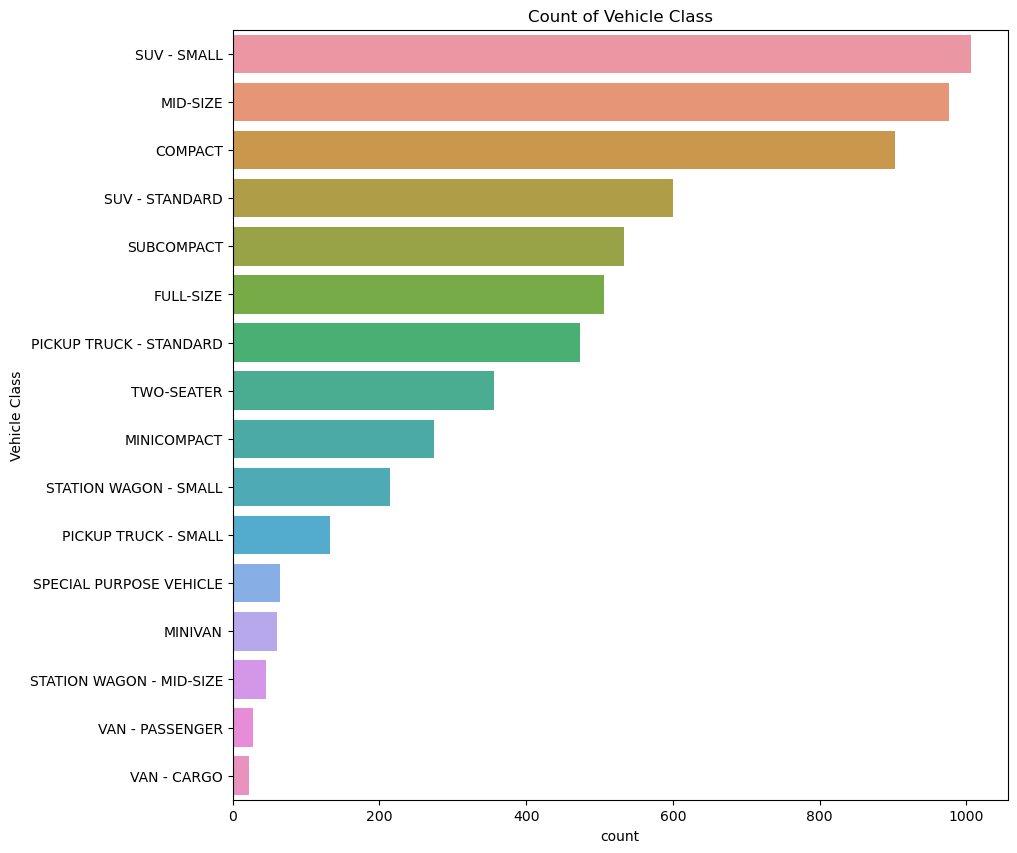

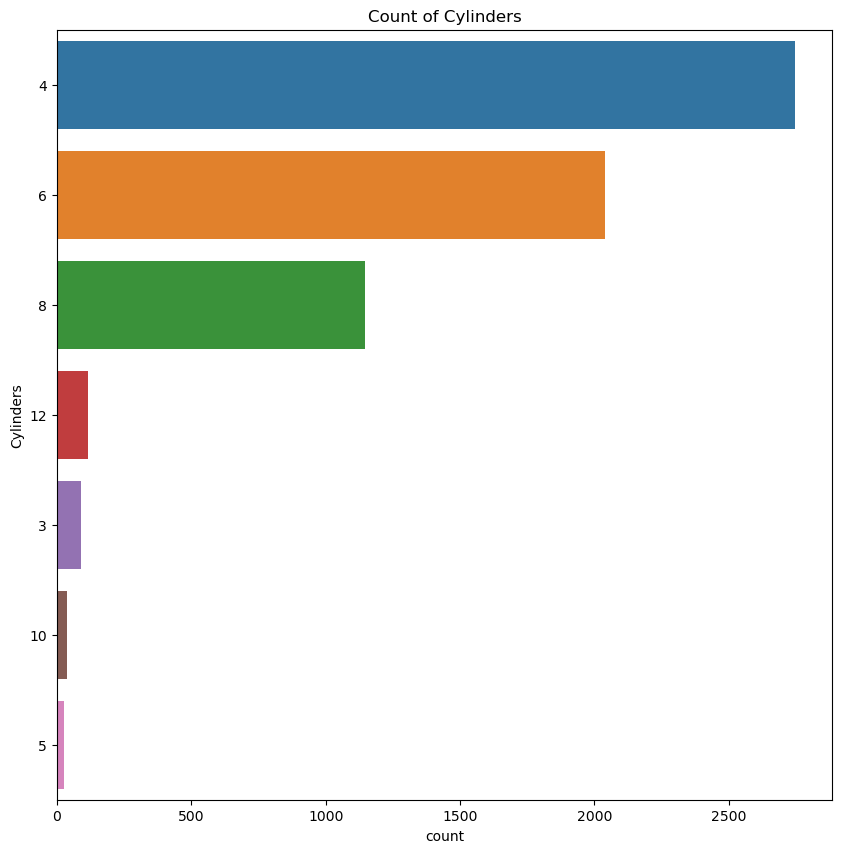

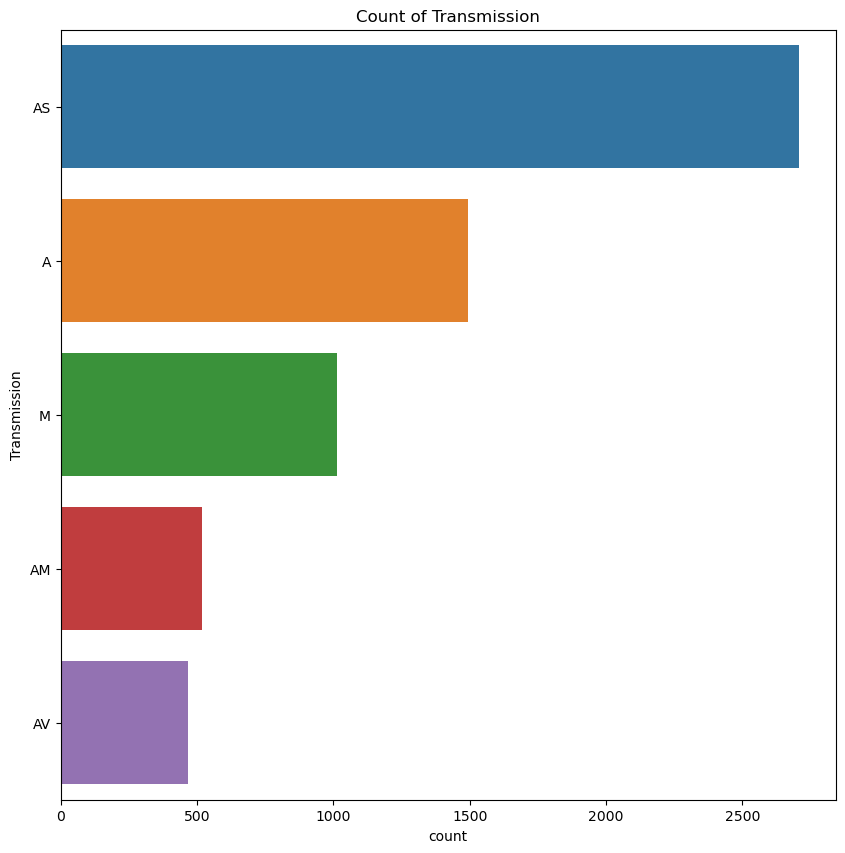

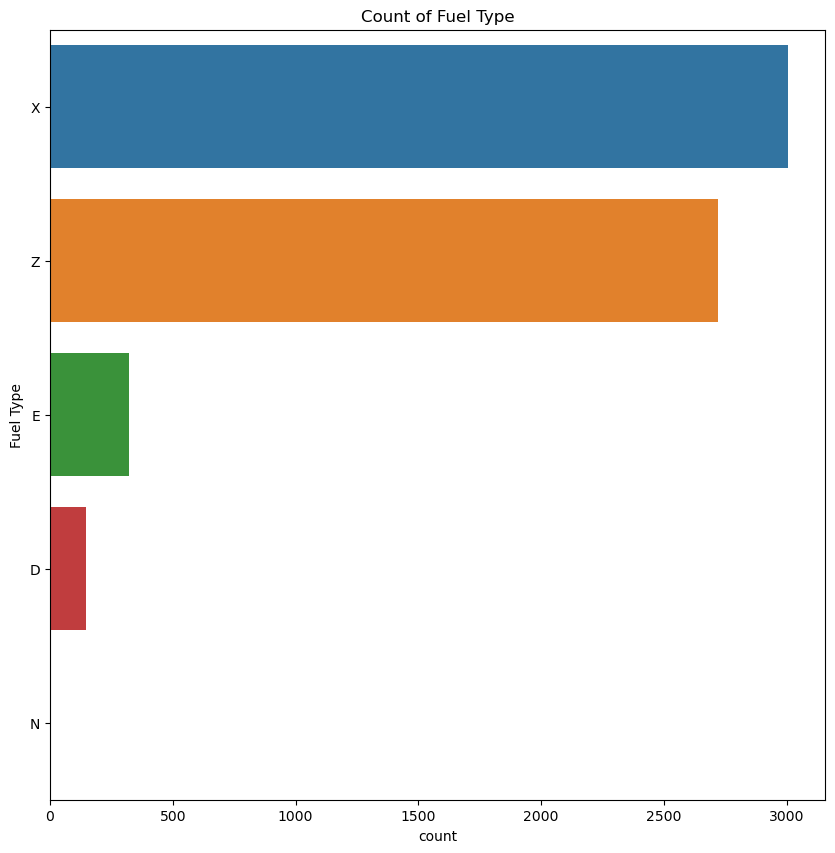

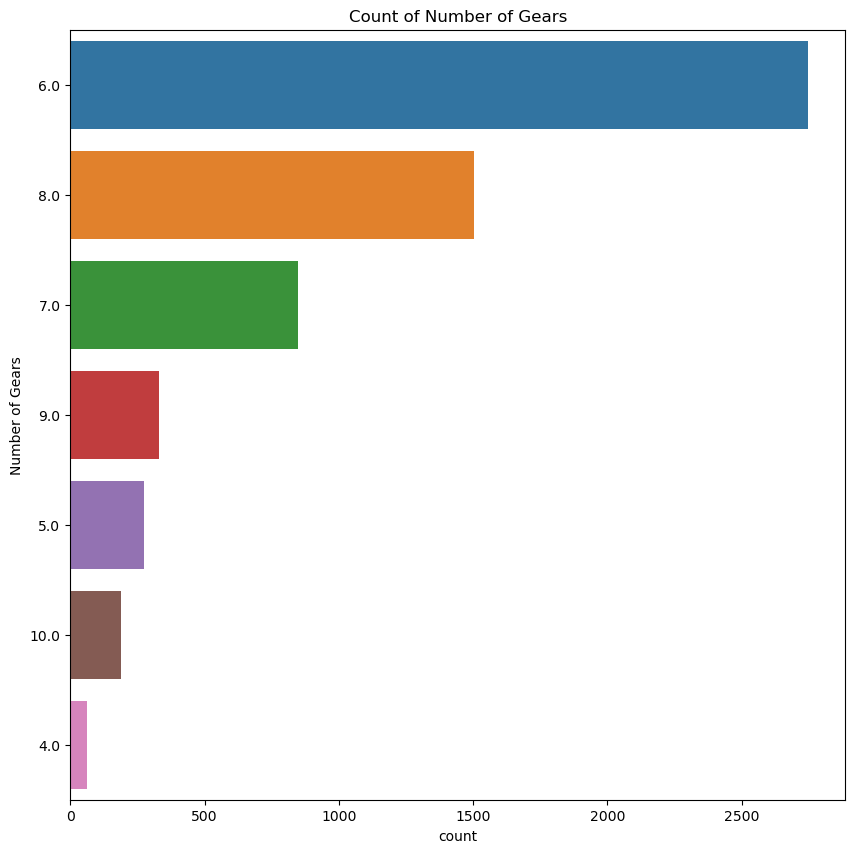

In [34]:
for var in catDf.columns:
    plt.figure(figsize=(10, 10))
    sb.countplot(y=var, data=df_filtered2, order=df_filtered2[var].value_counts().index)
    plt.title(f'Count of {var}')
    plt.show()

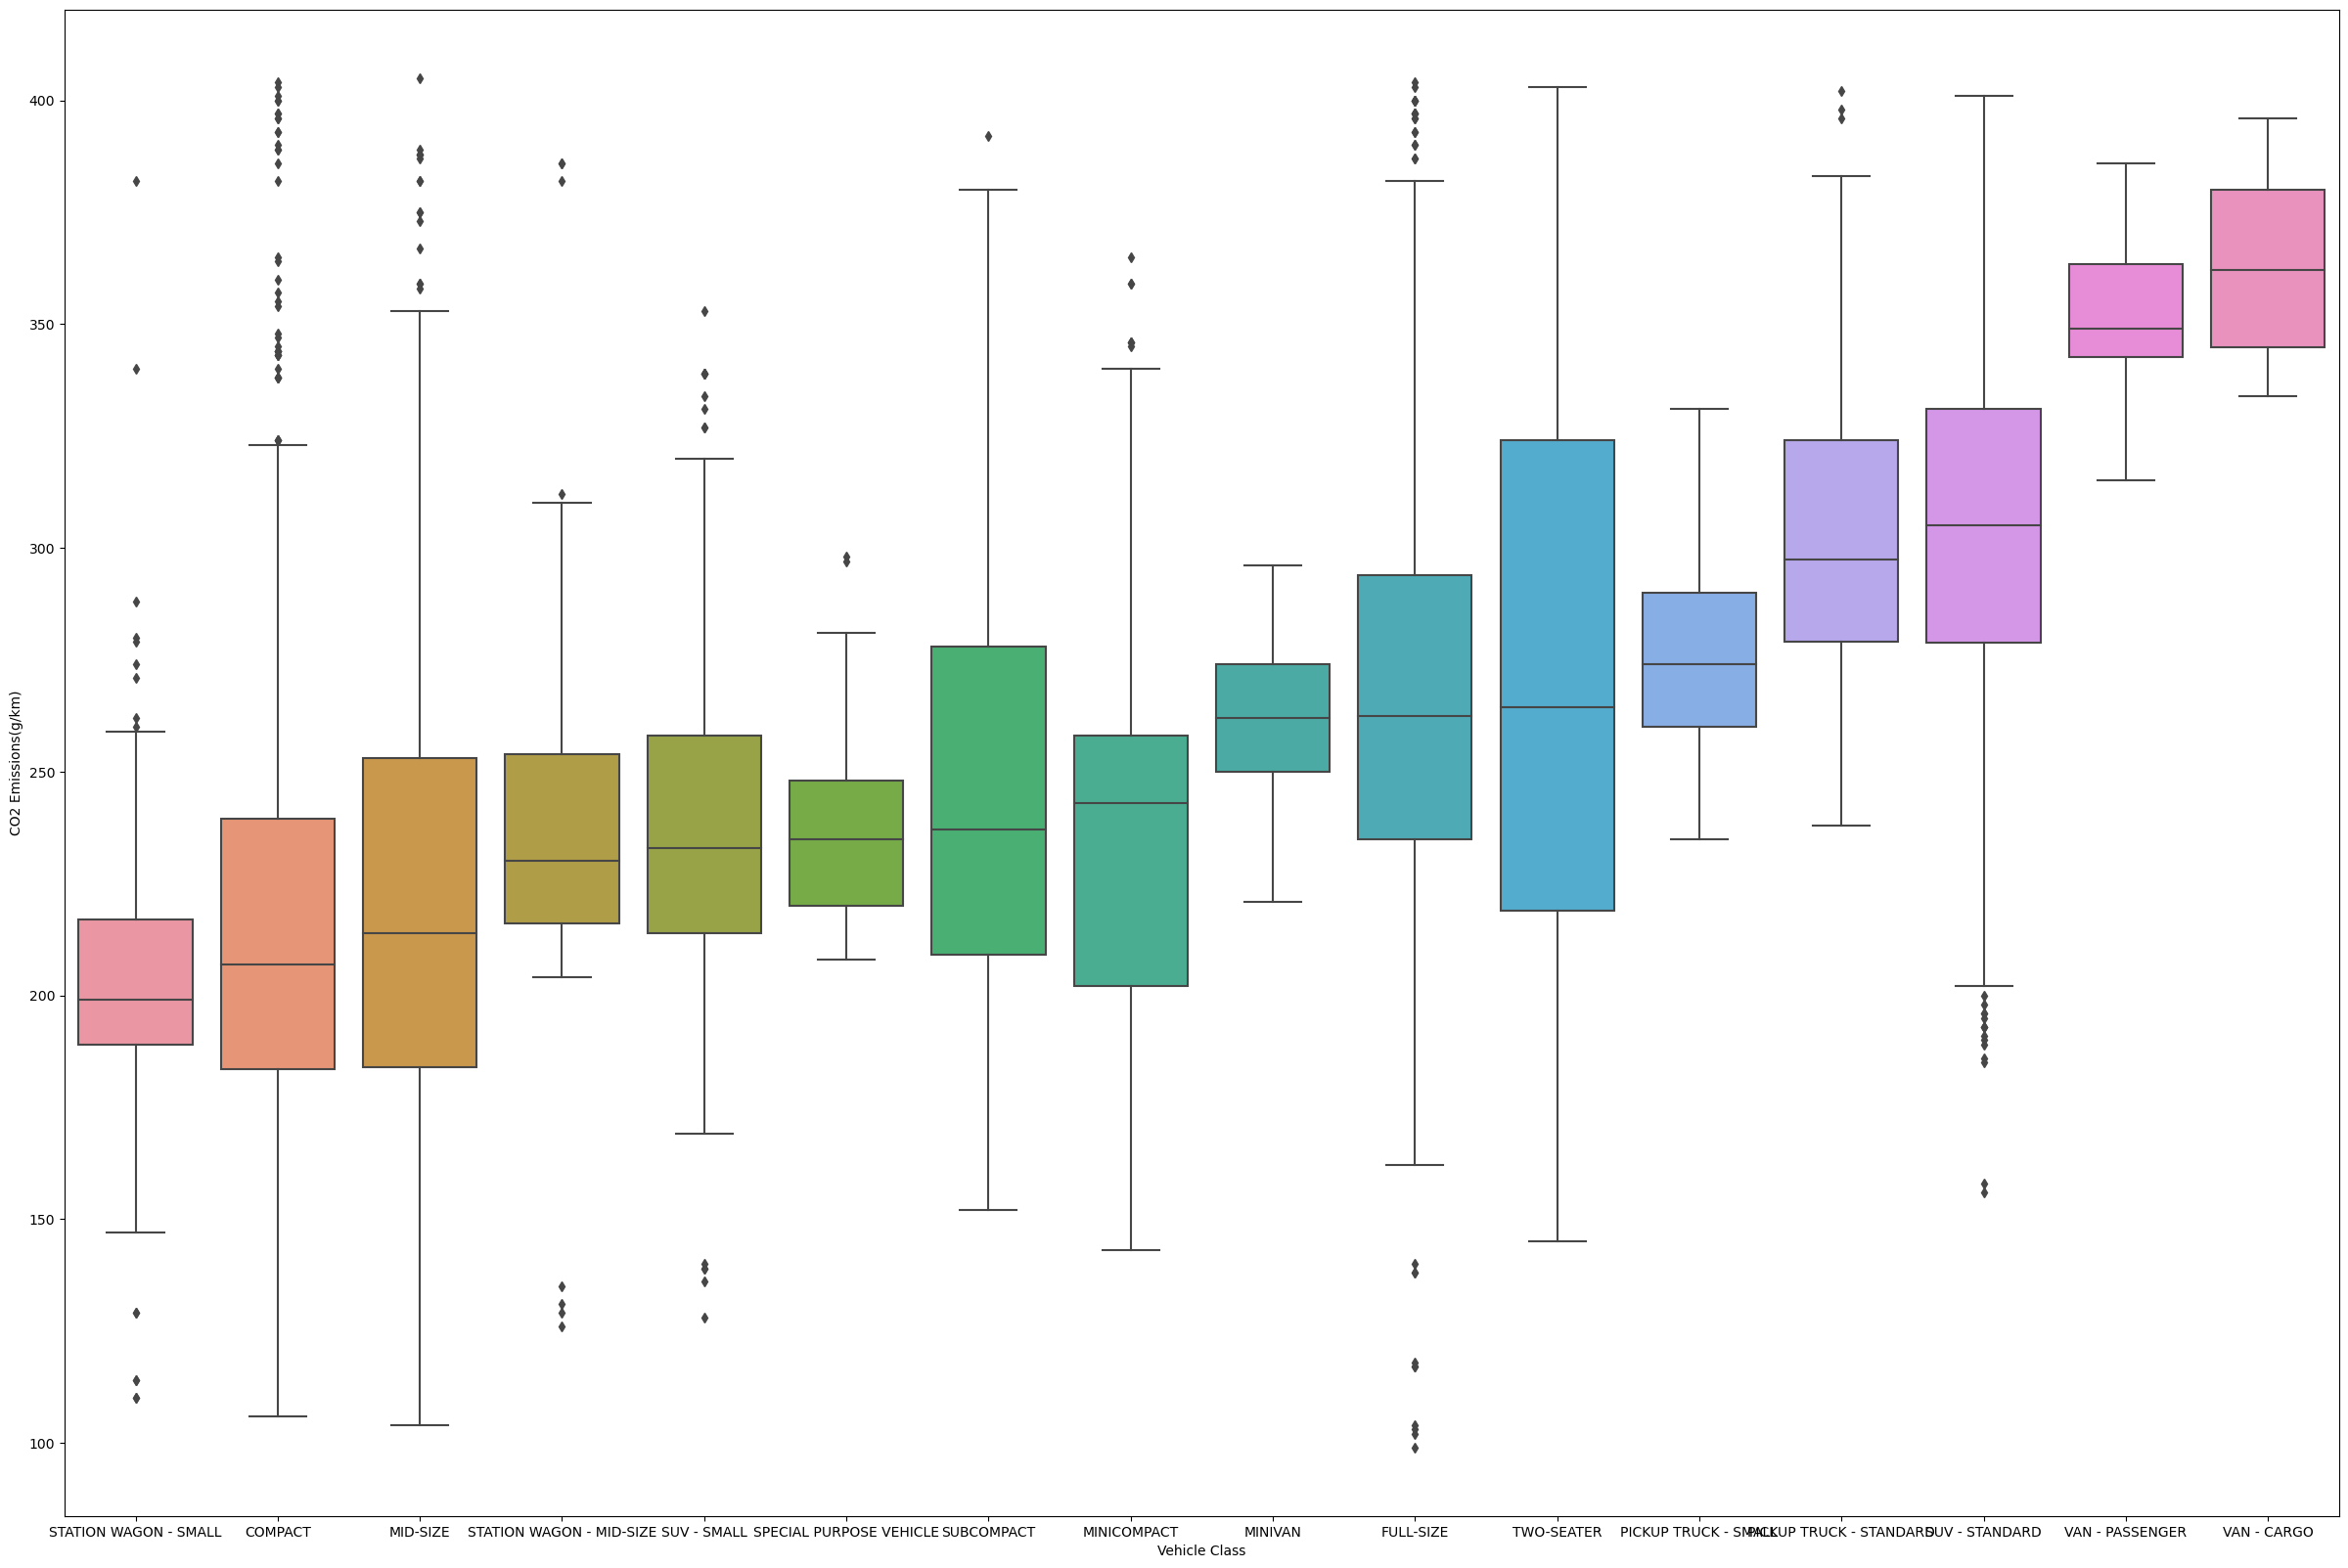

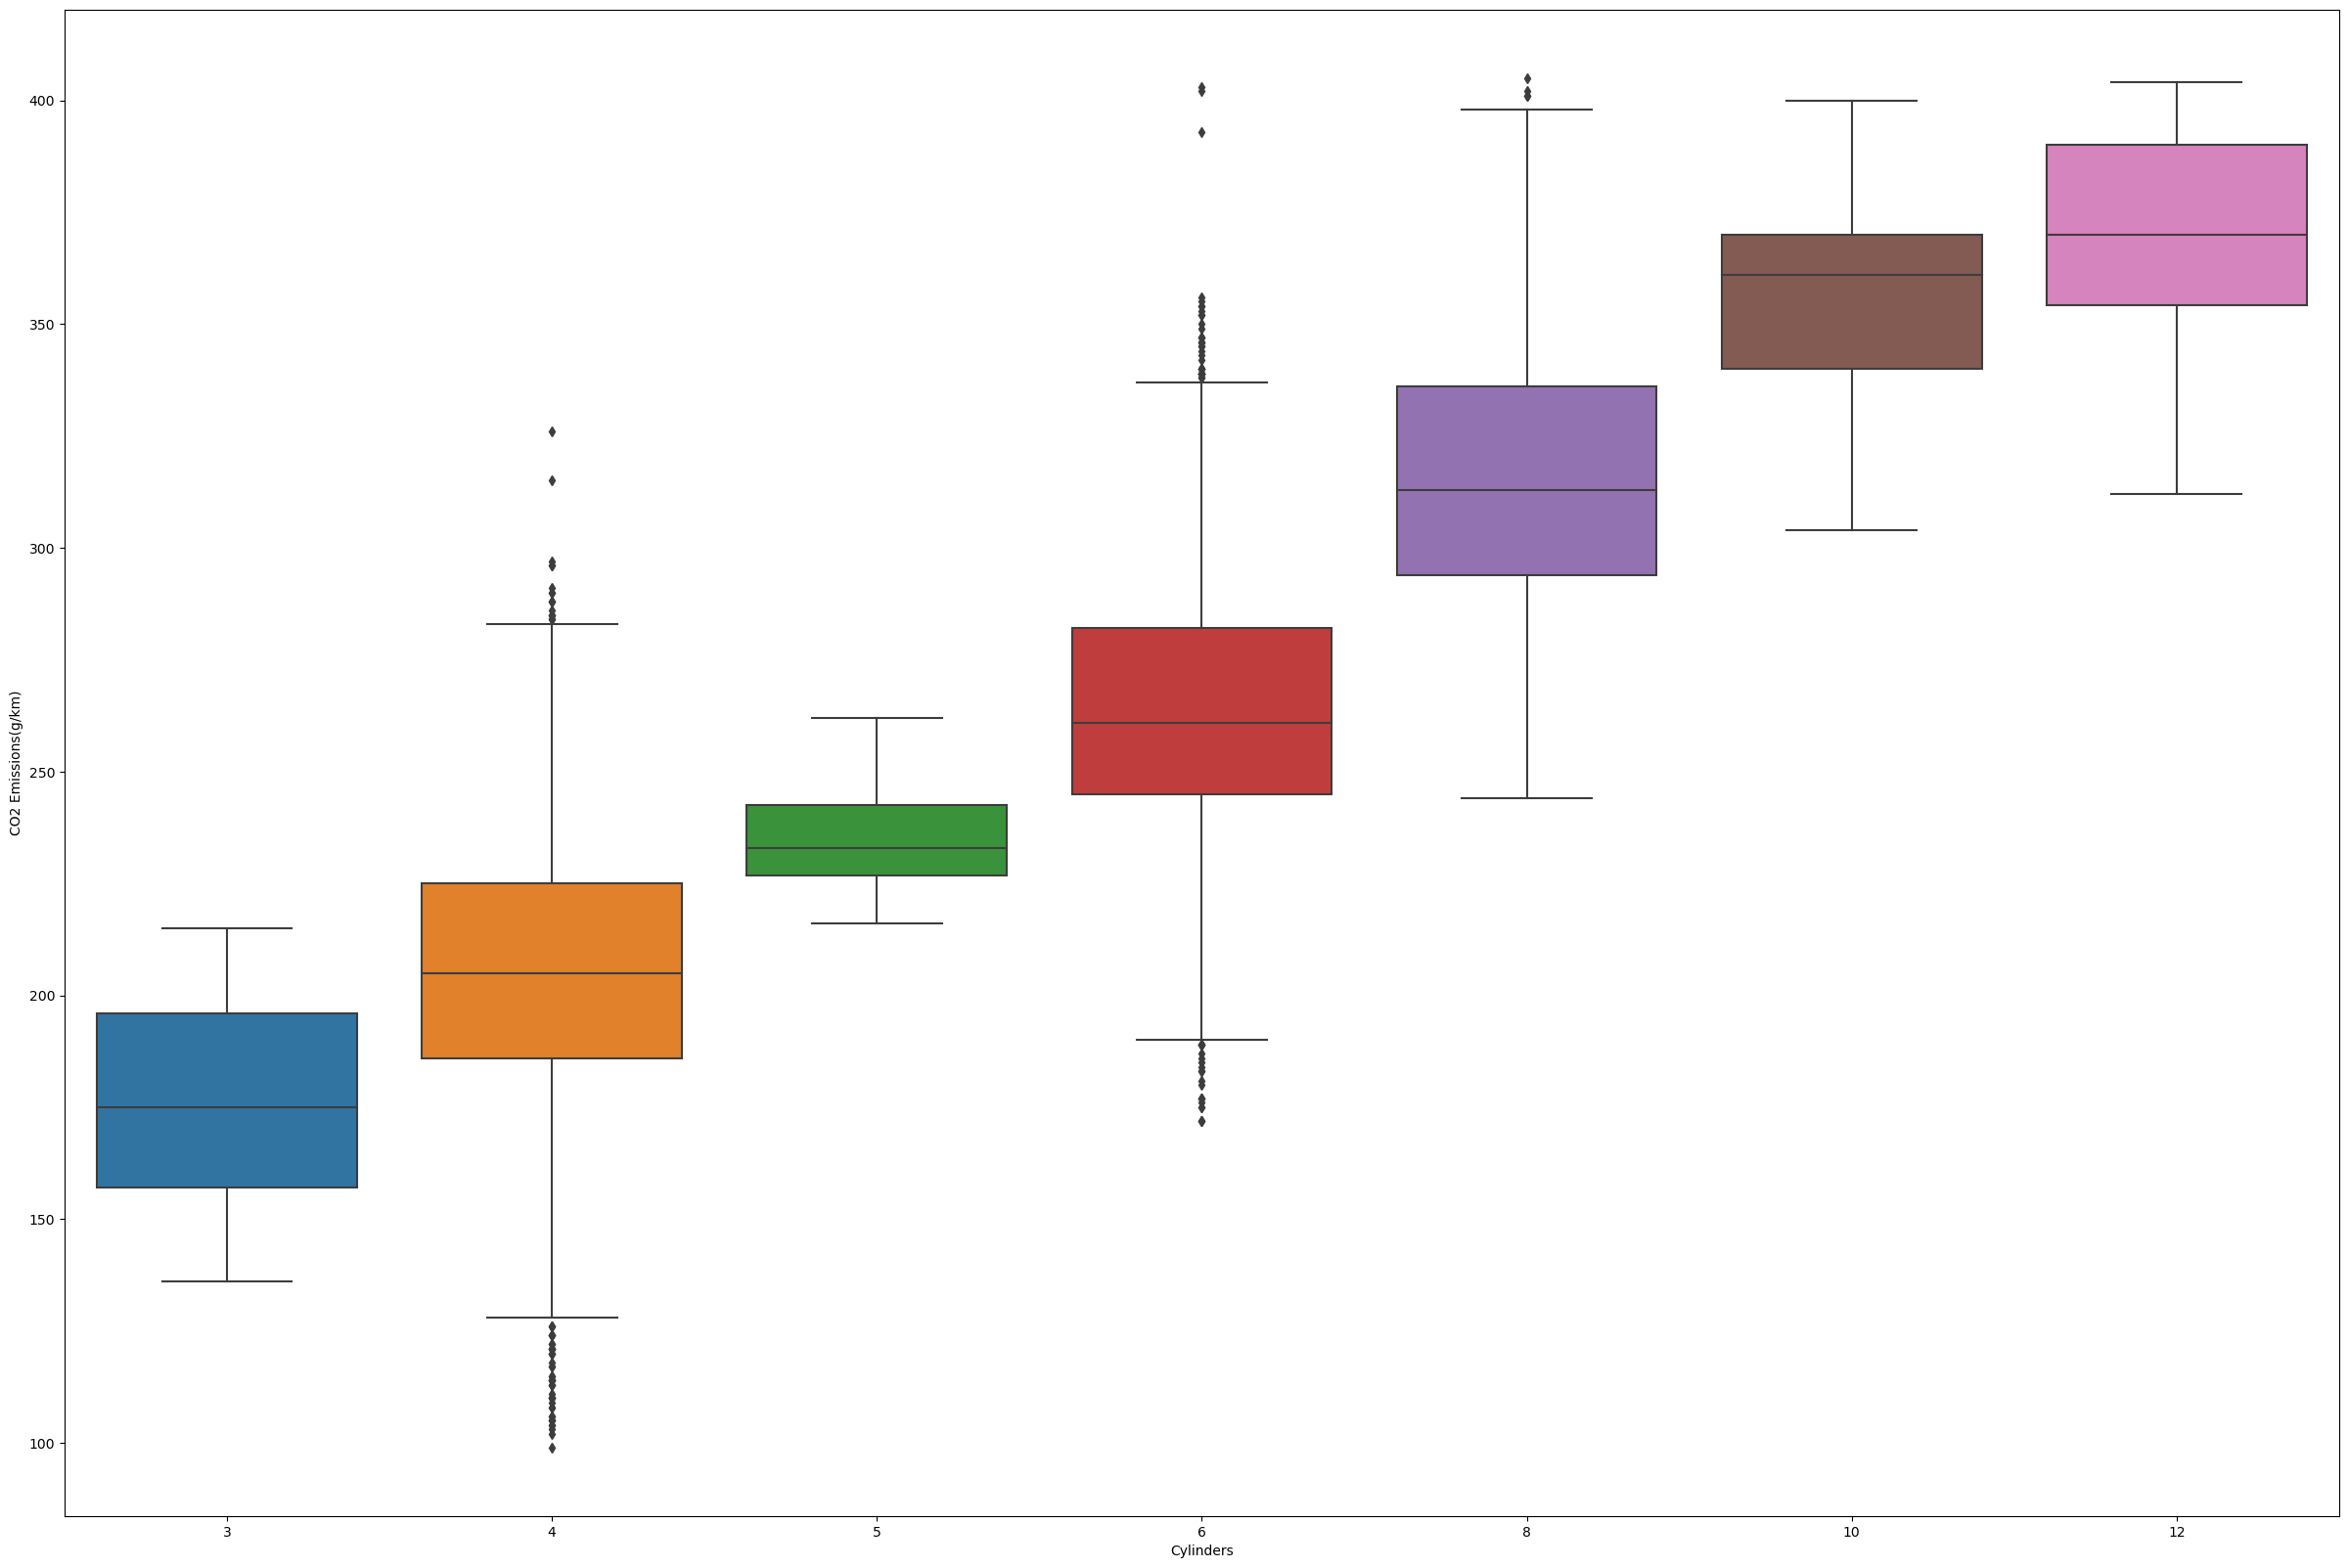

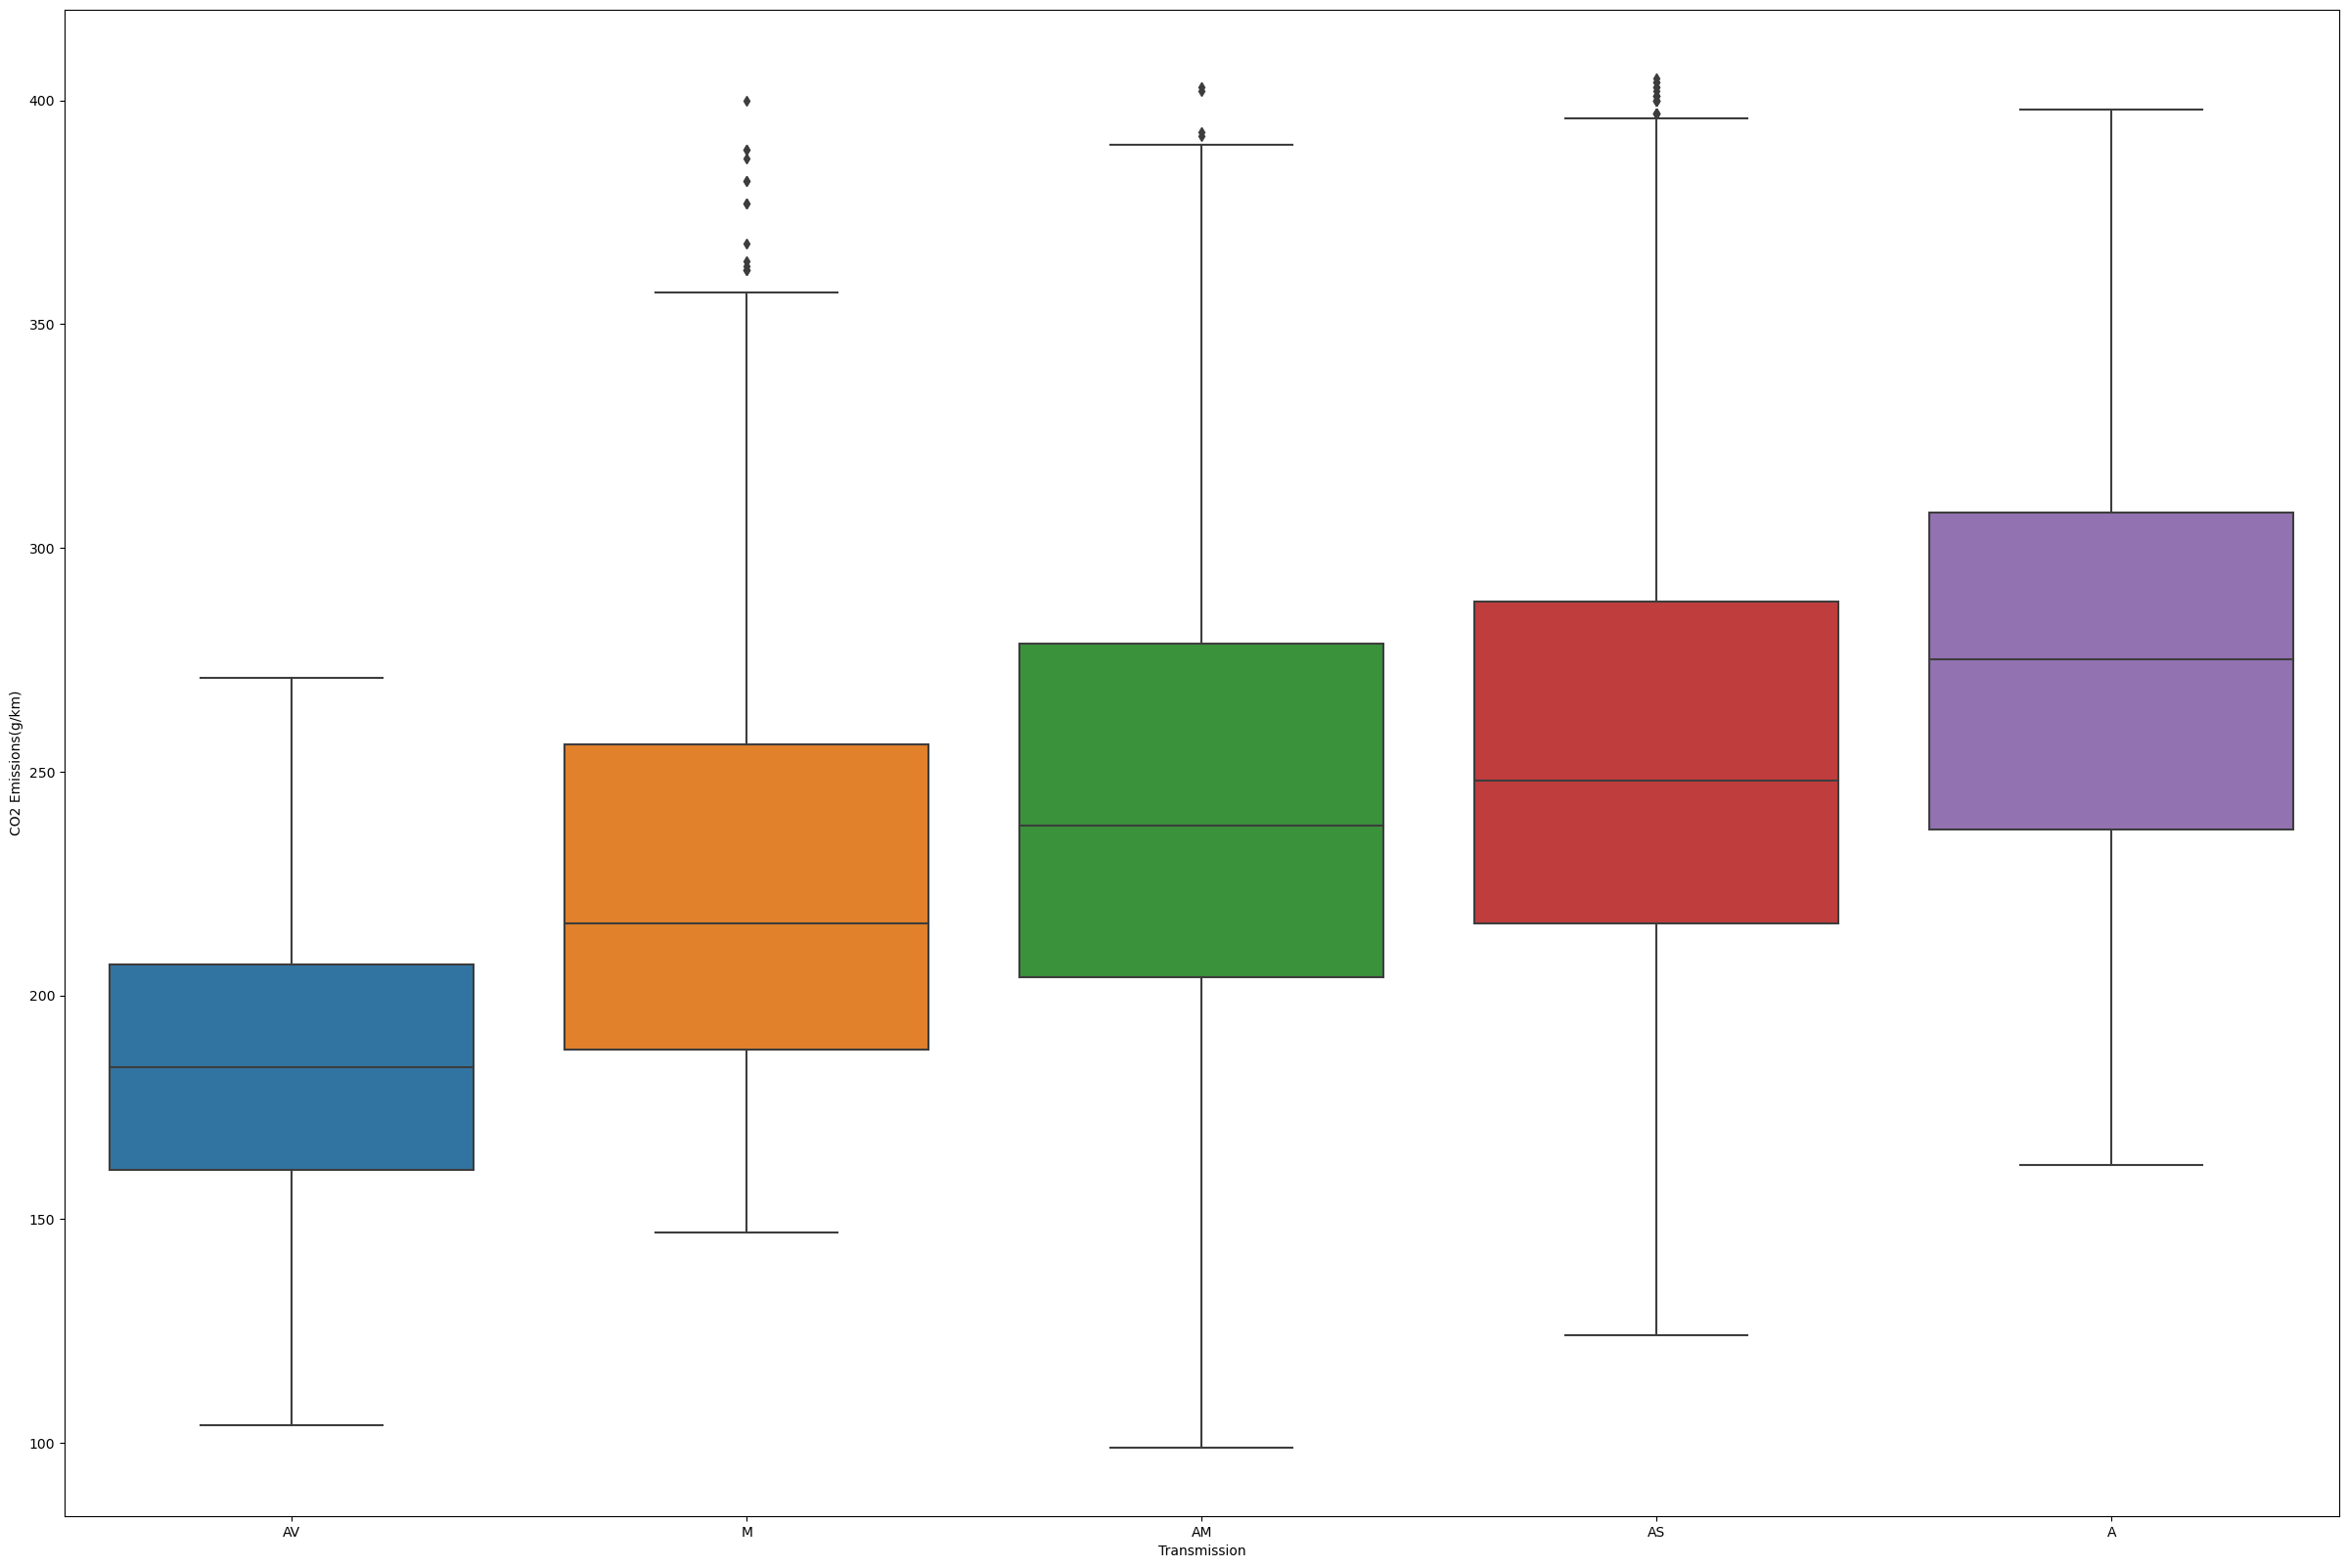

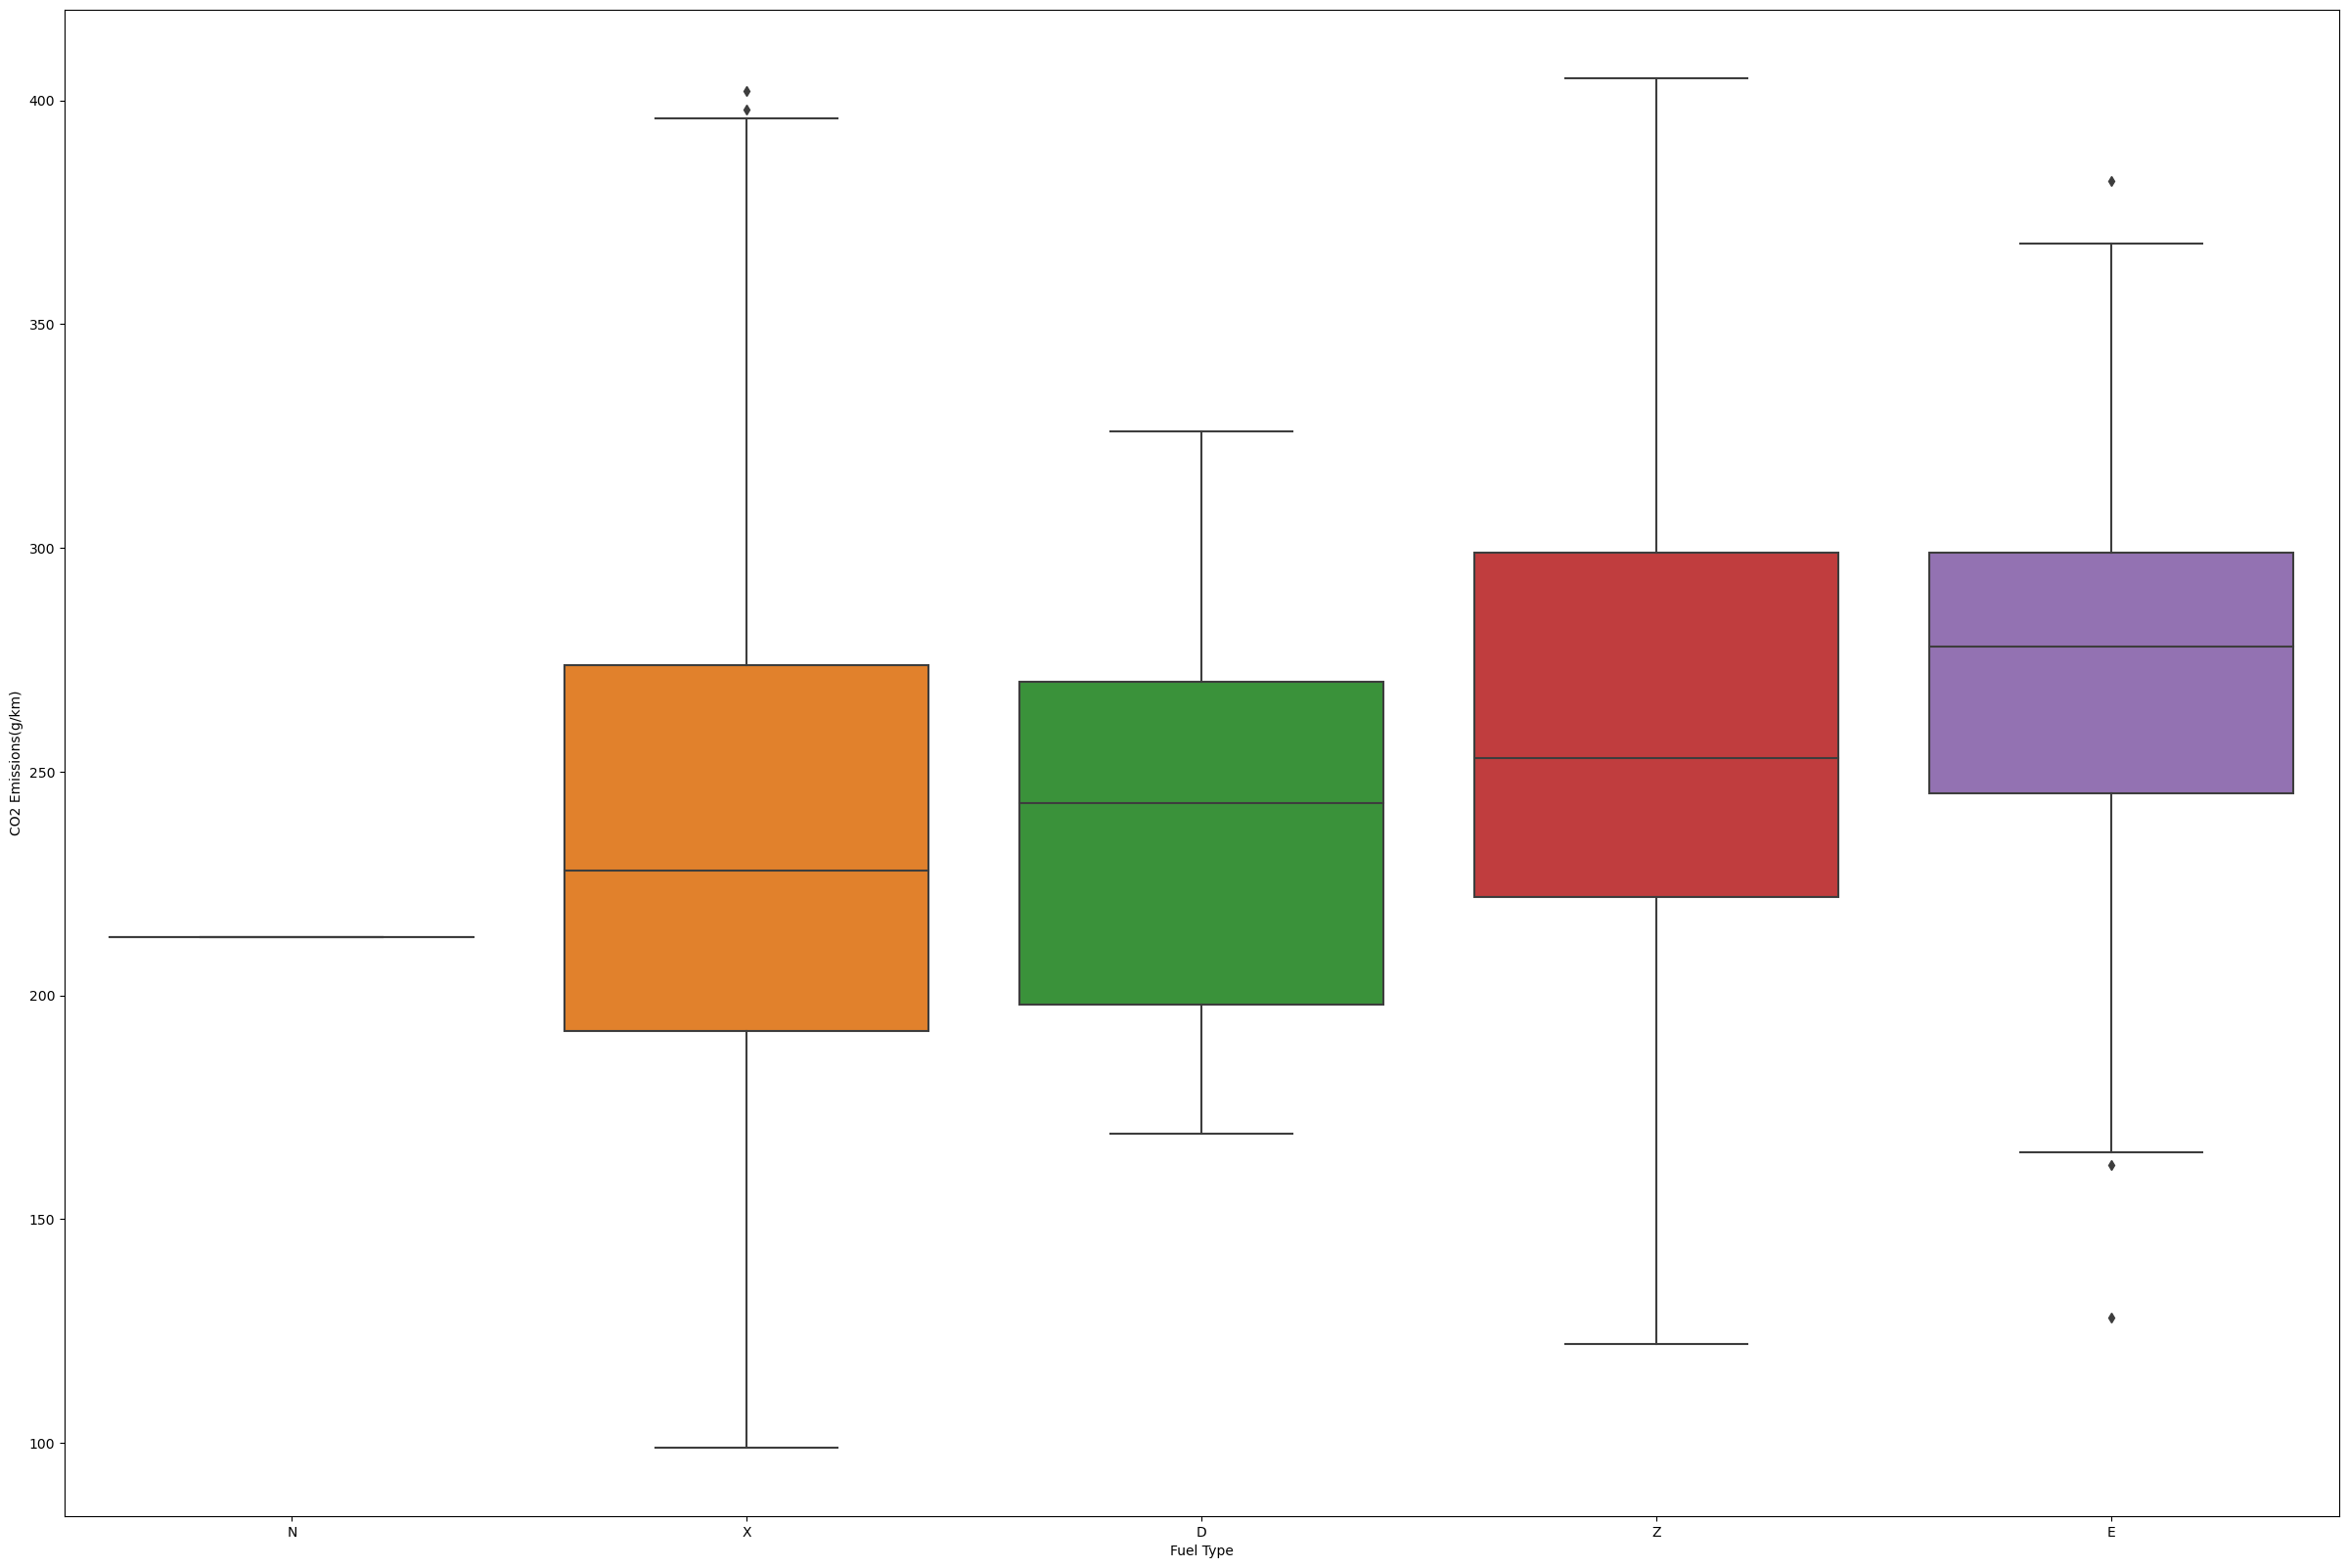

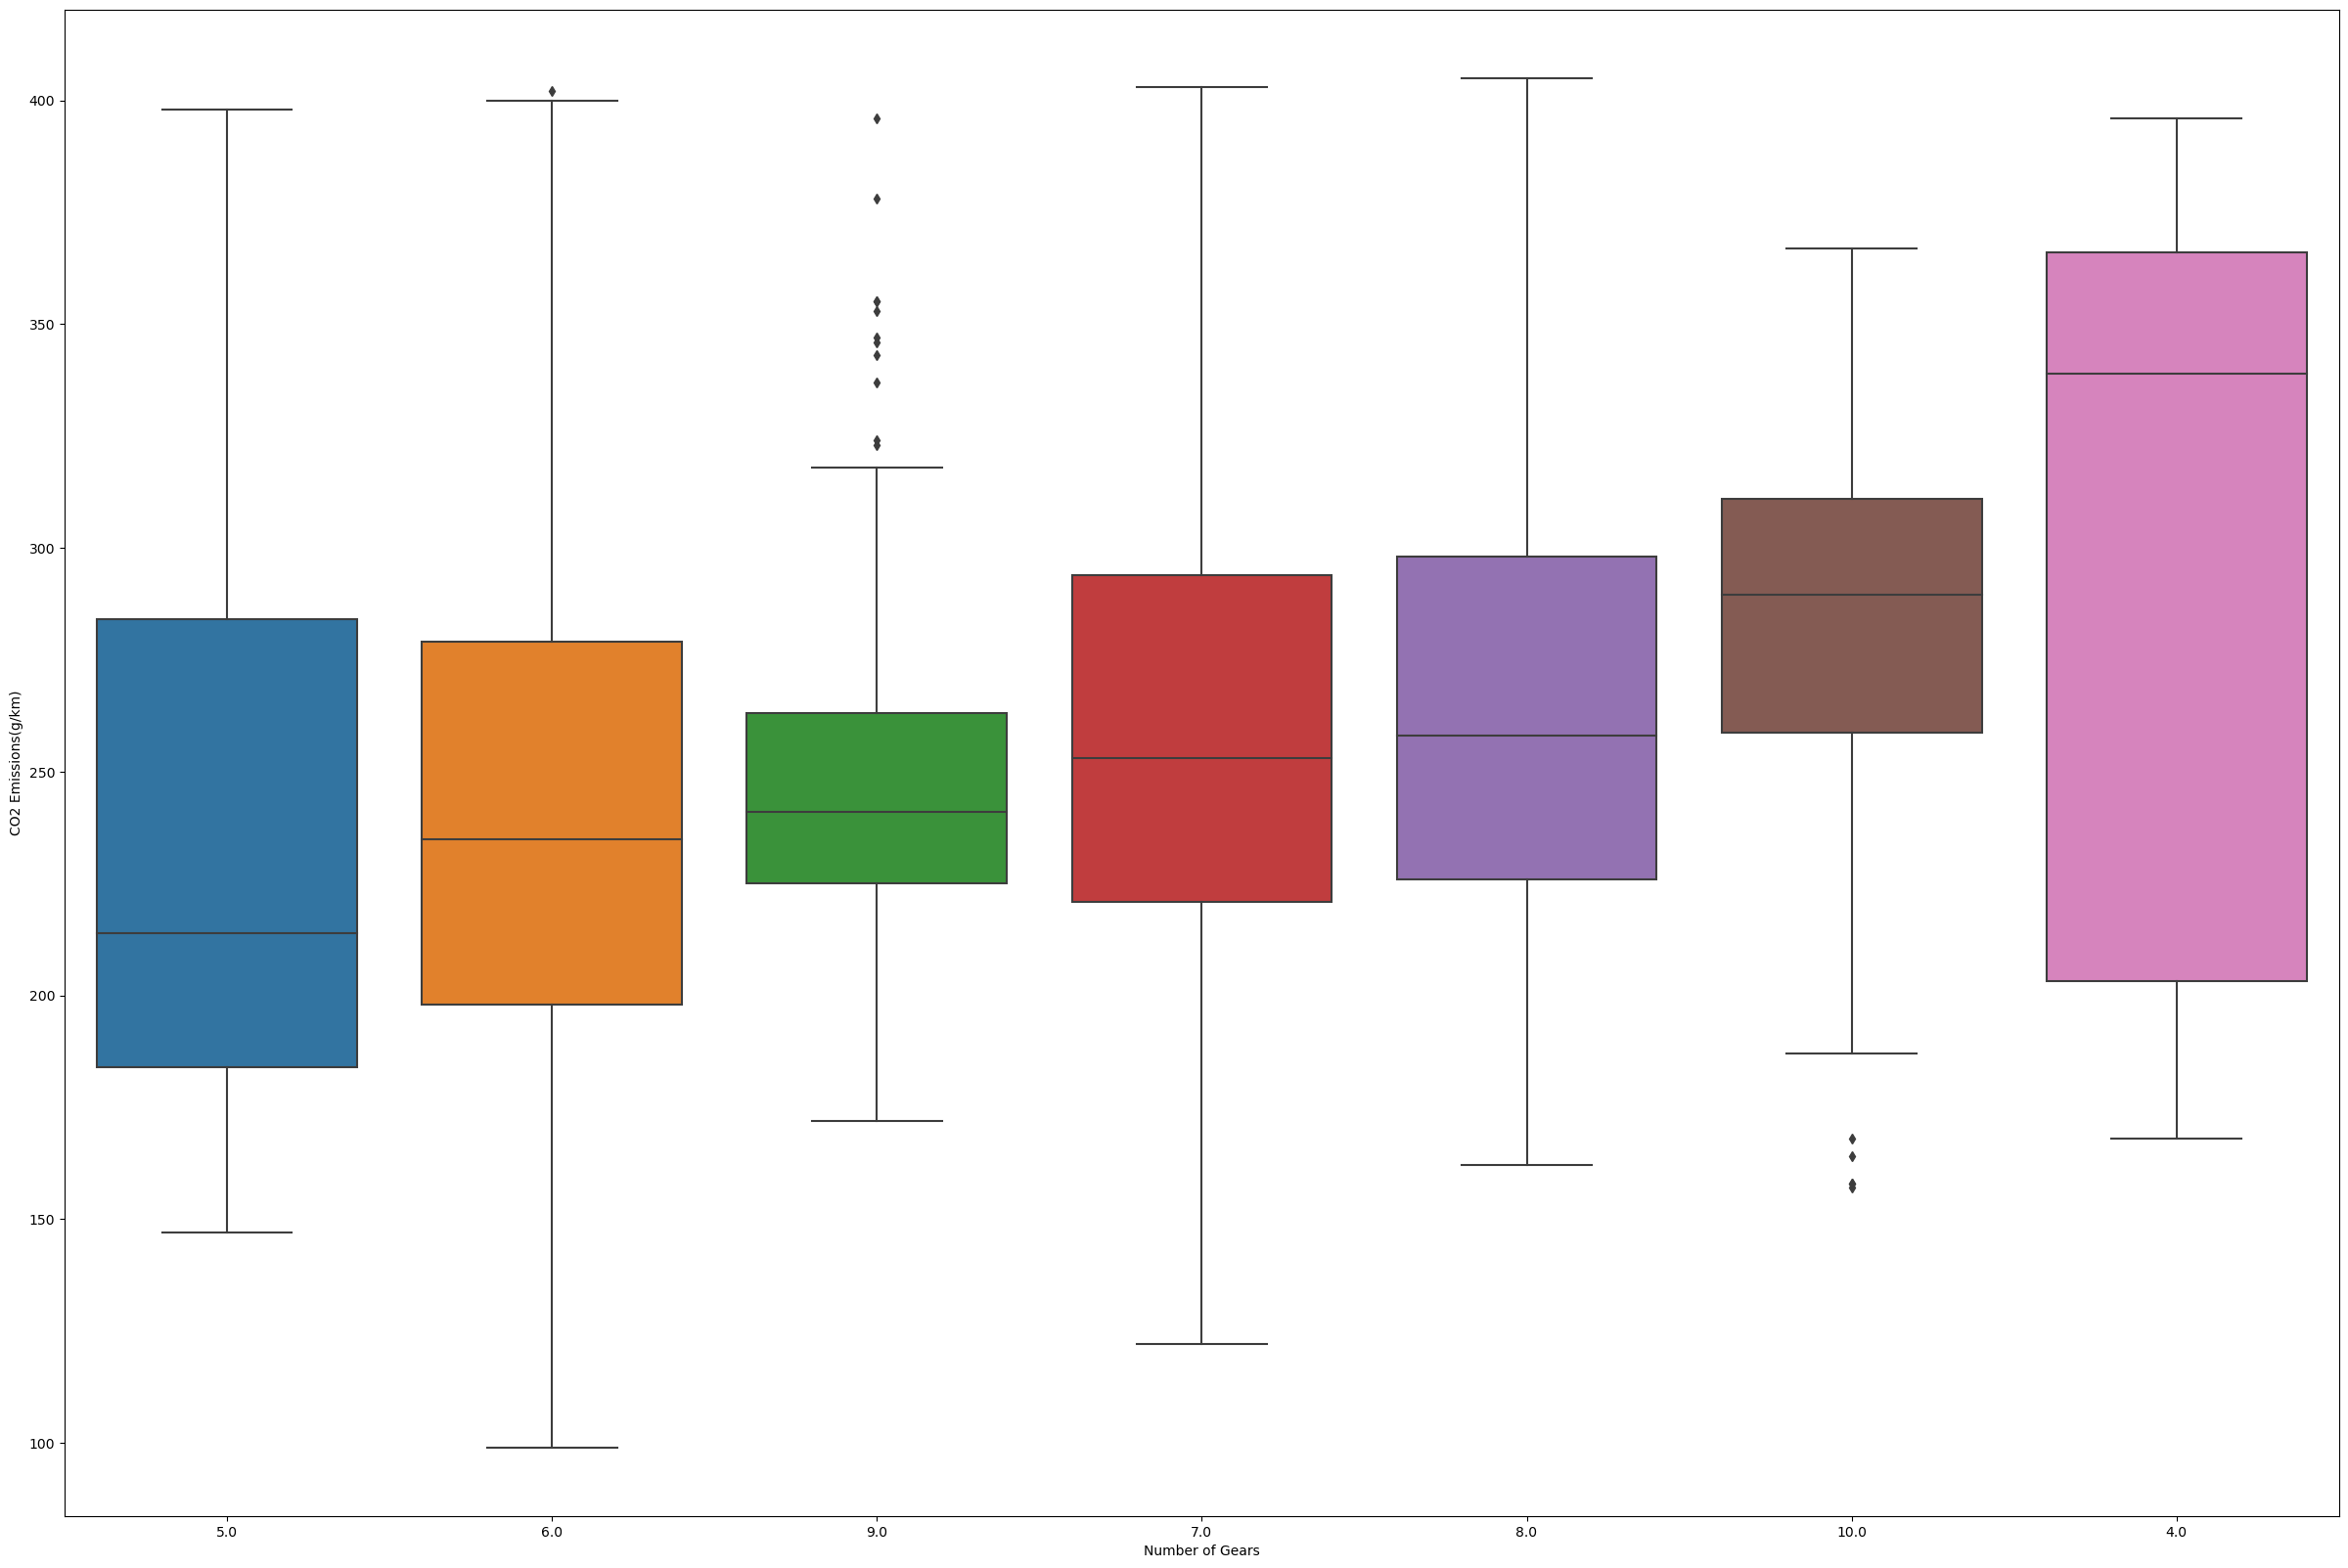

In [32]:
for var in catDf:
    catDf_var = pd.DataFrame(df_filtered2[[var, 'CO2 Emissions(g/km)']])
    f = plt.figure(figsize=(30, 20))
    order = catDf_var.groupby(var)['CO2 Emissions(g/km)'].median().sort_values().index
    sb.boxplot(x=var, y='CO2 Emissions(g/km)', data=catDf_var, order = order)

From the boxplots, it can be observed that Cylinders may be the most useful in predicting CO2 Emissions. The change in number of Cylinders affects the median and lower and upper quartile range most significantly. There are not many overlap between the boxplots and there is a general increase in CO2 emissions when number of Cylinders increases.

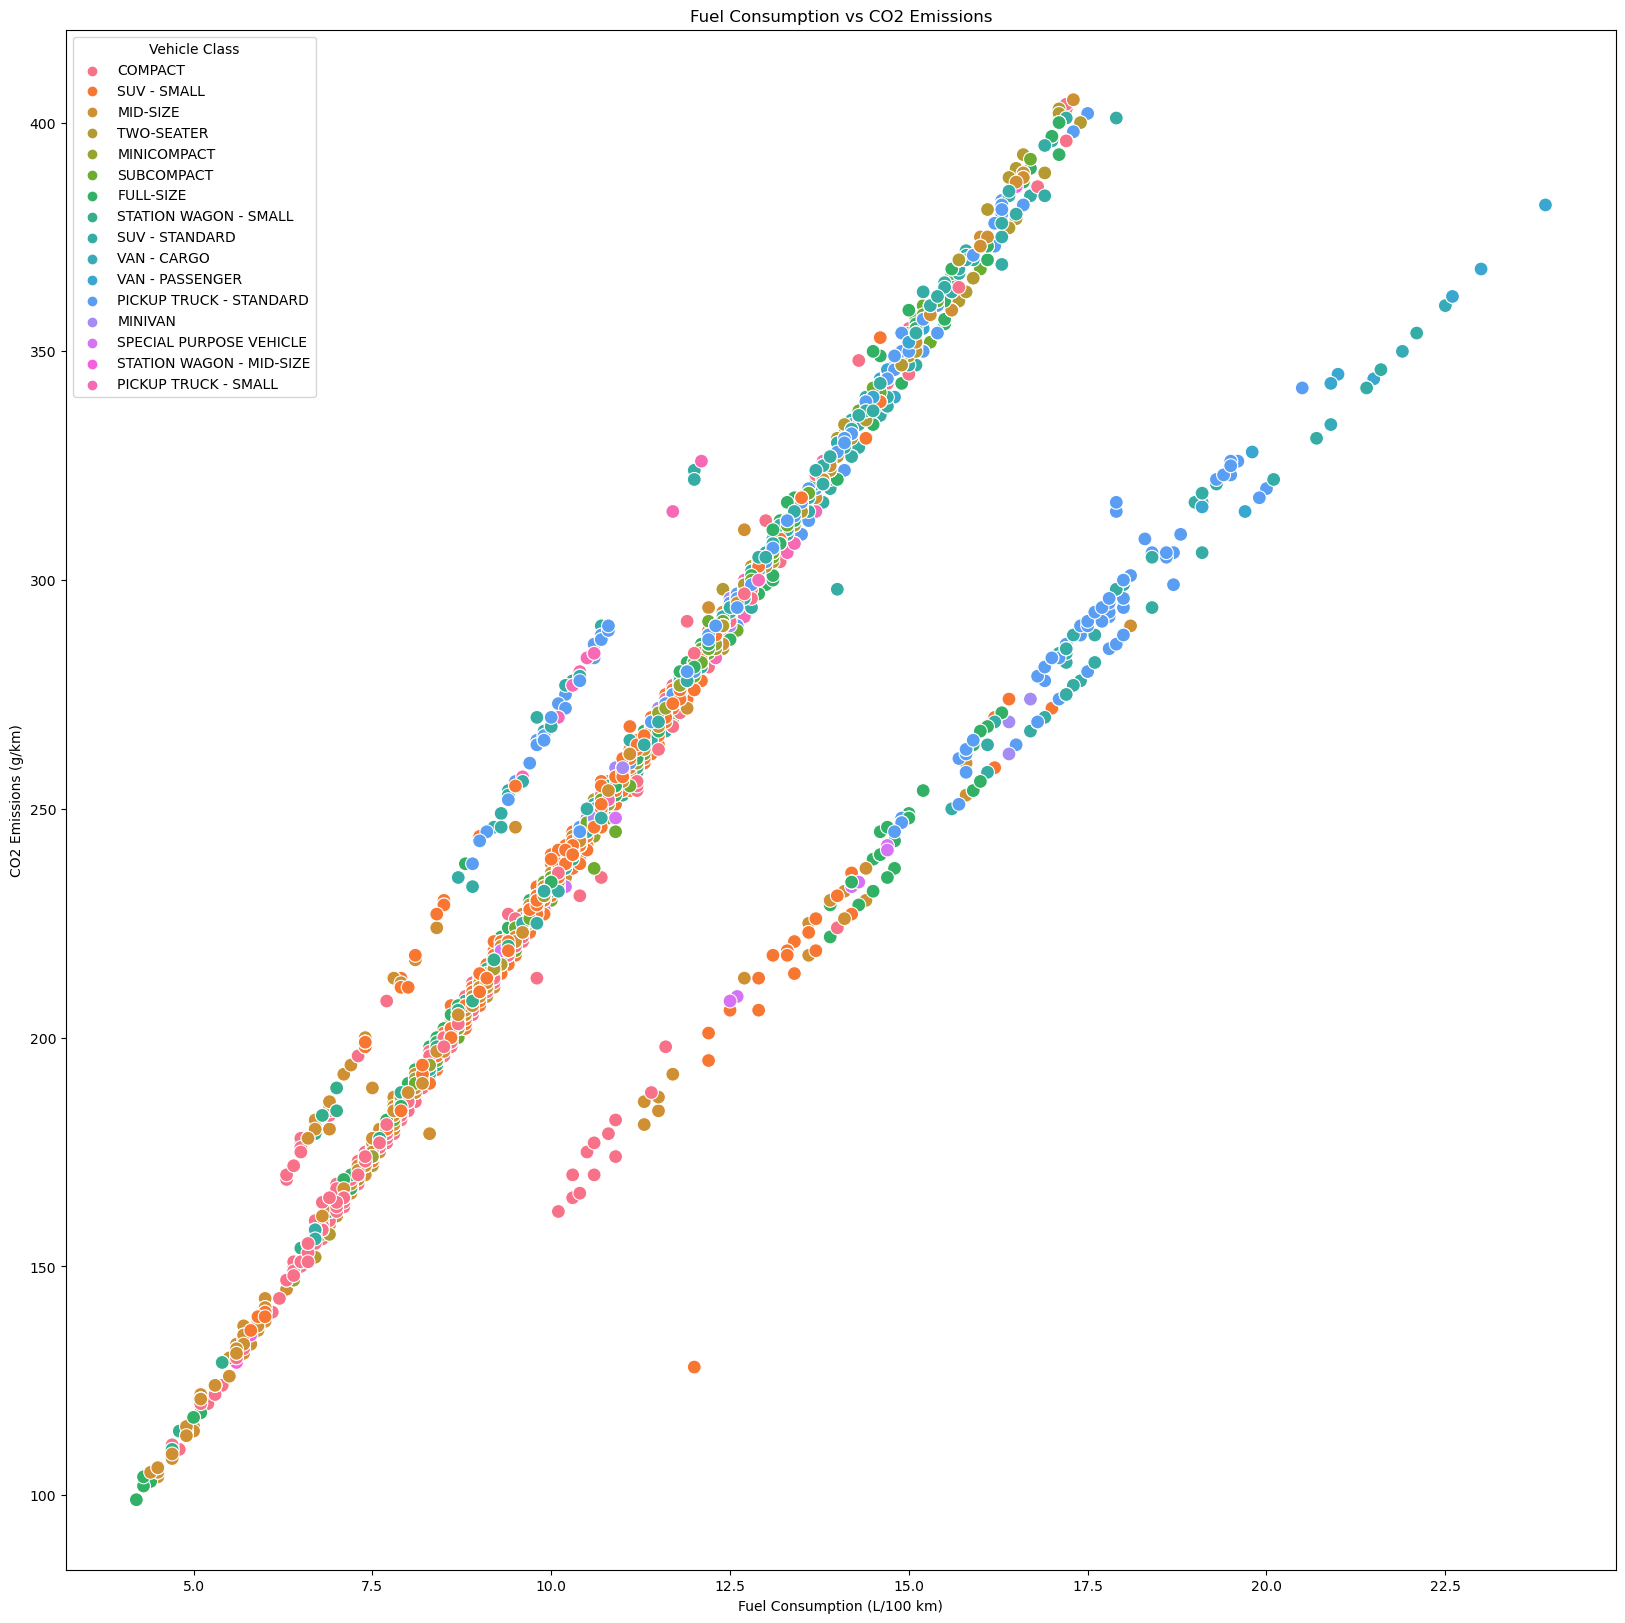

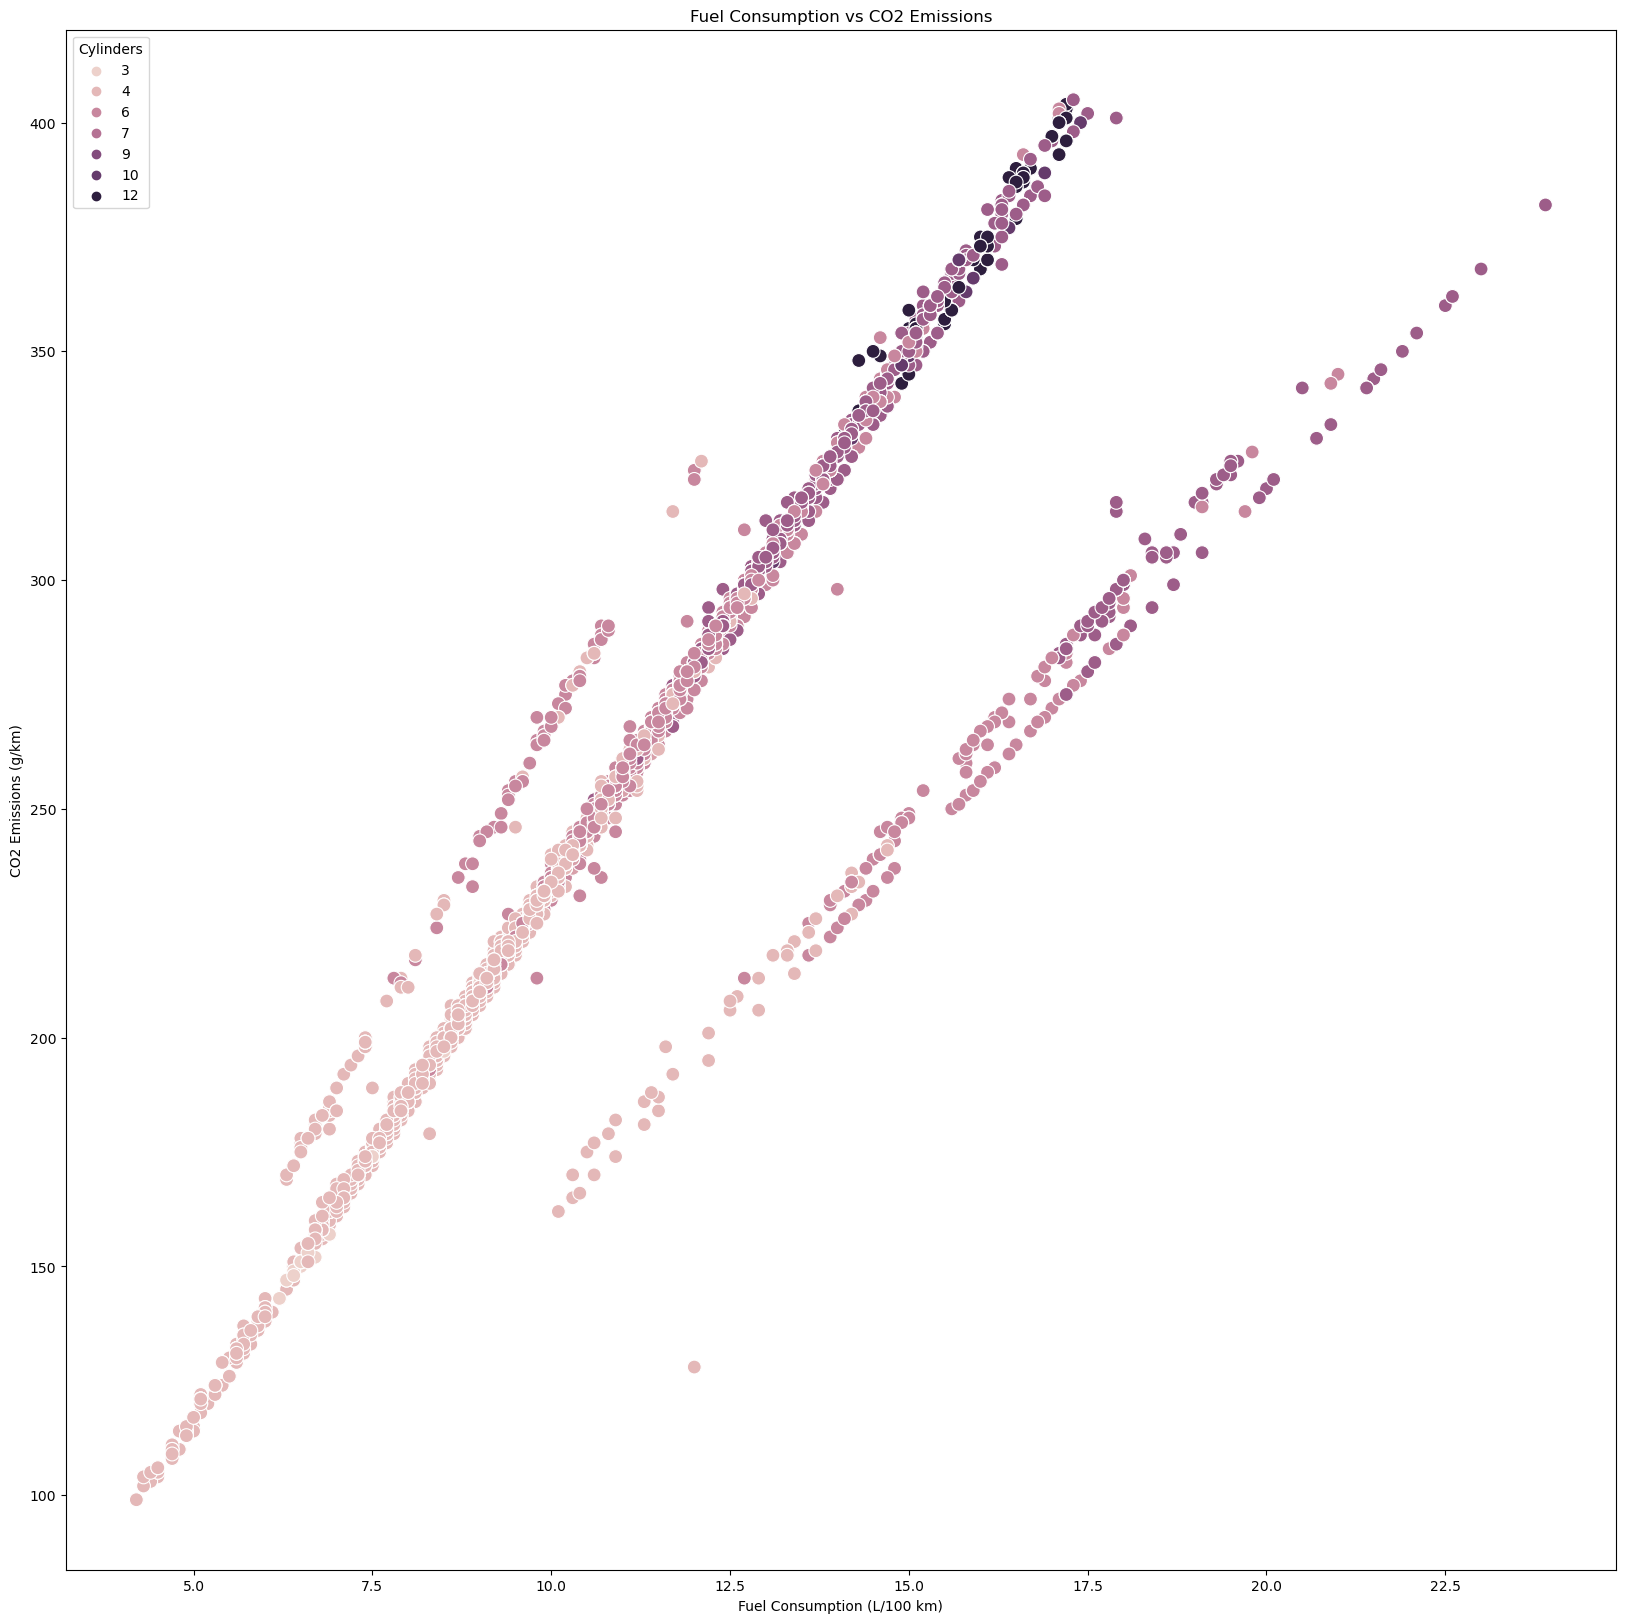

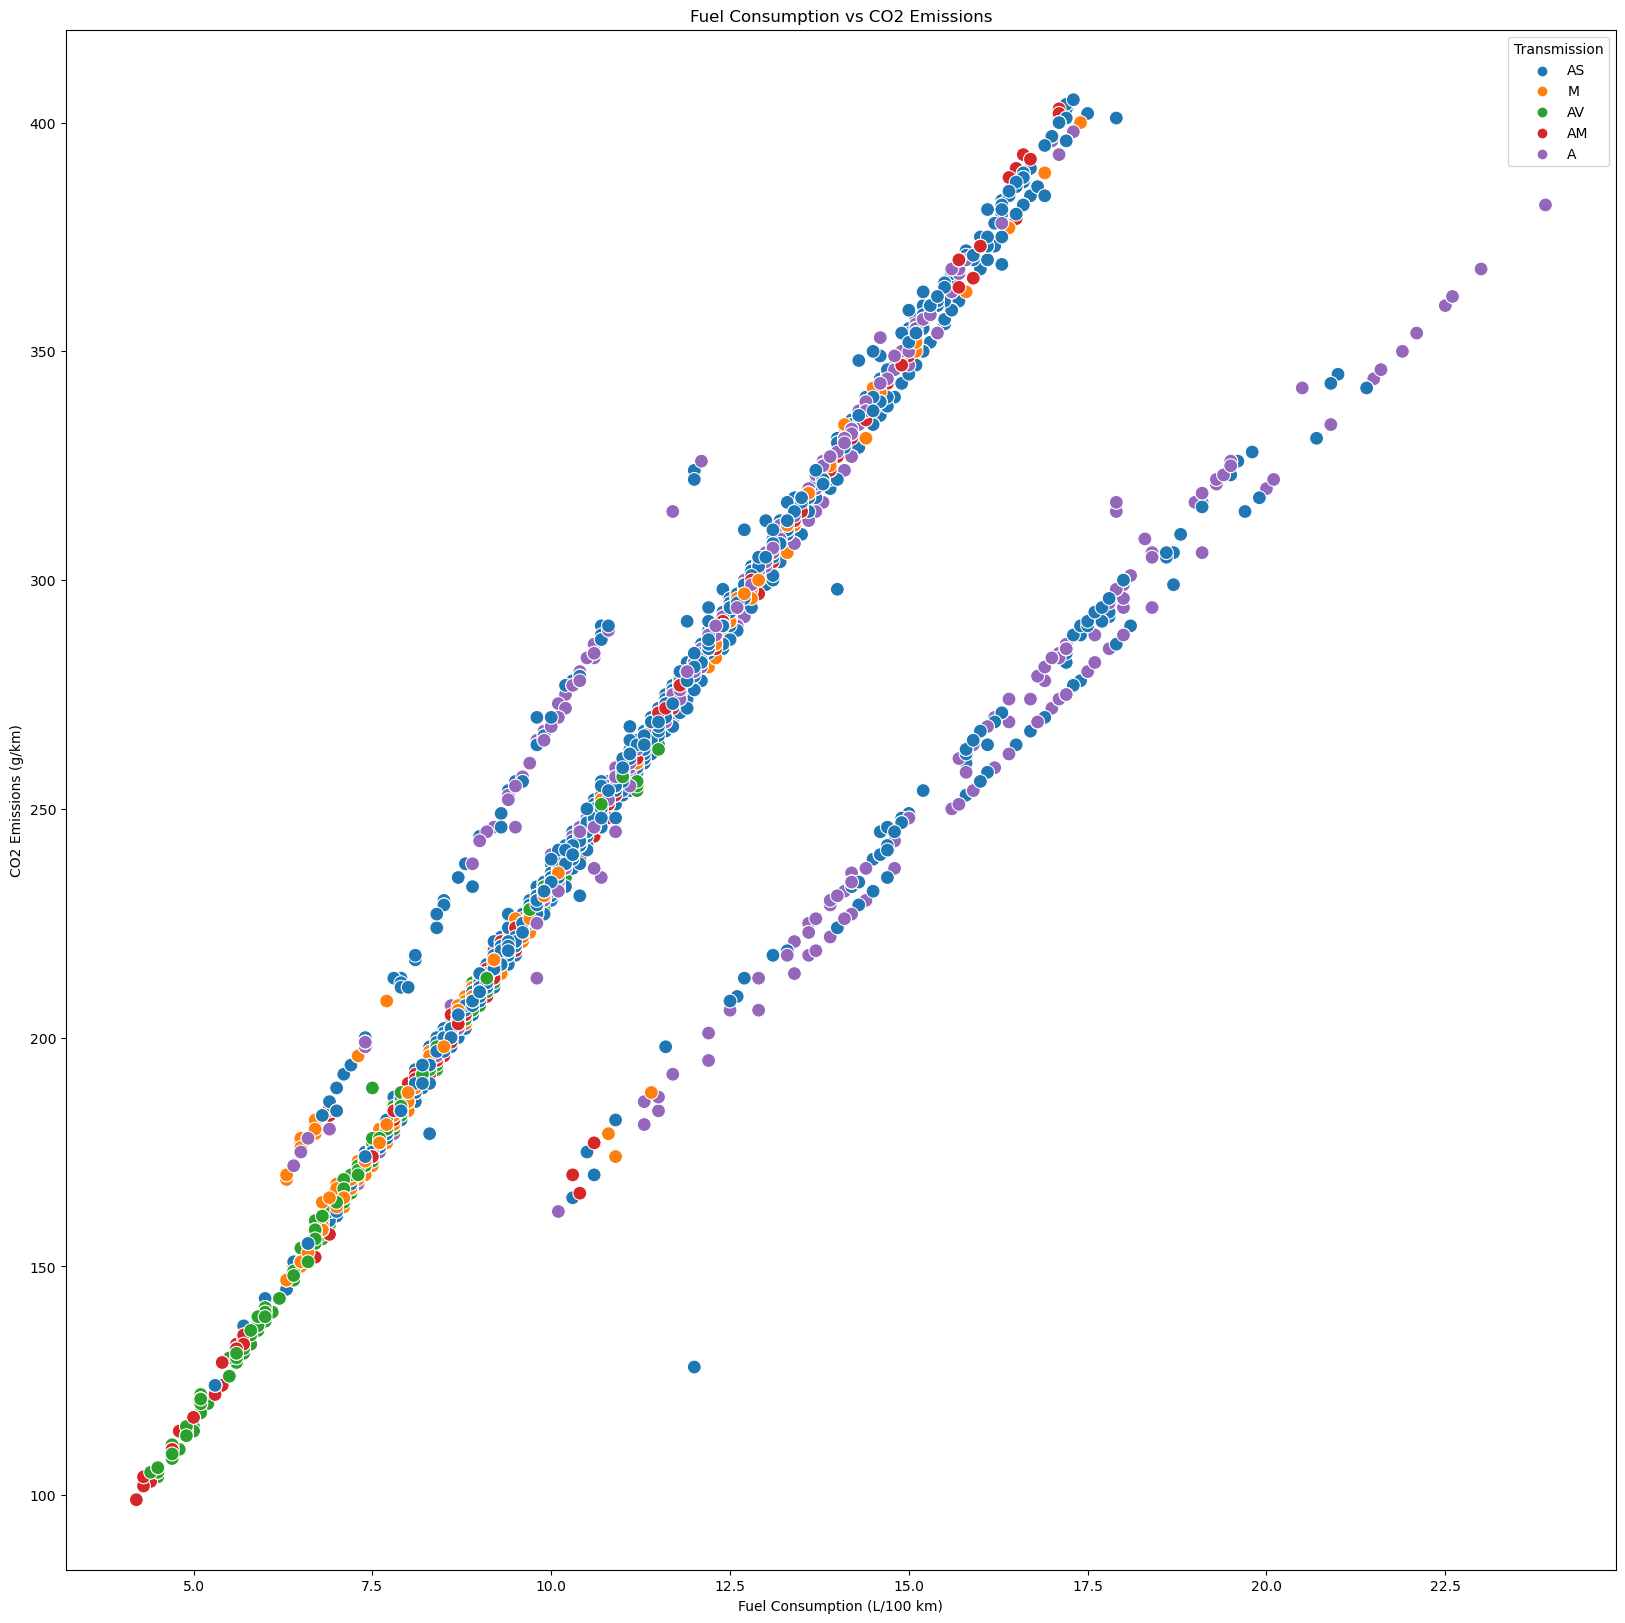

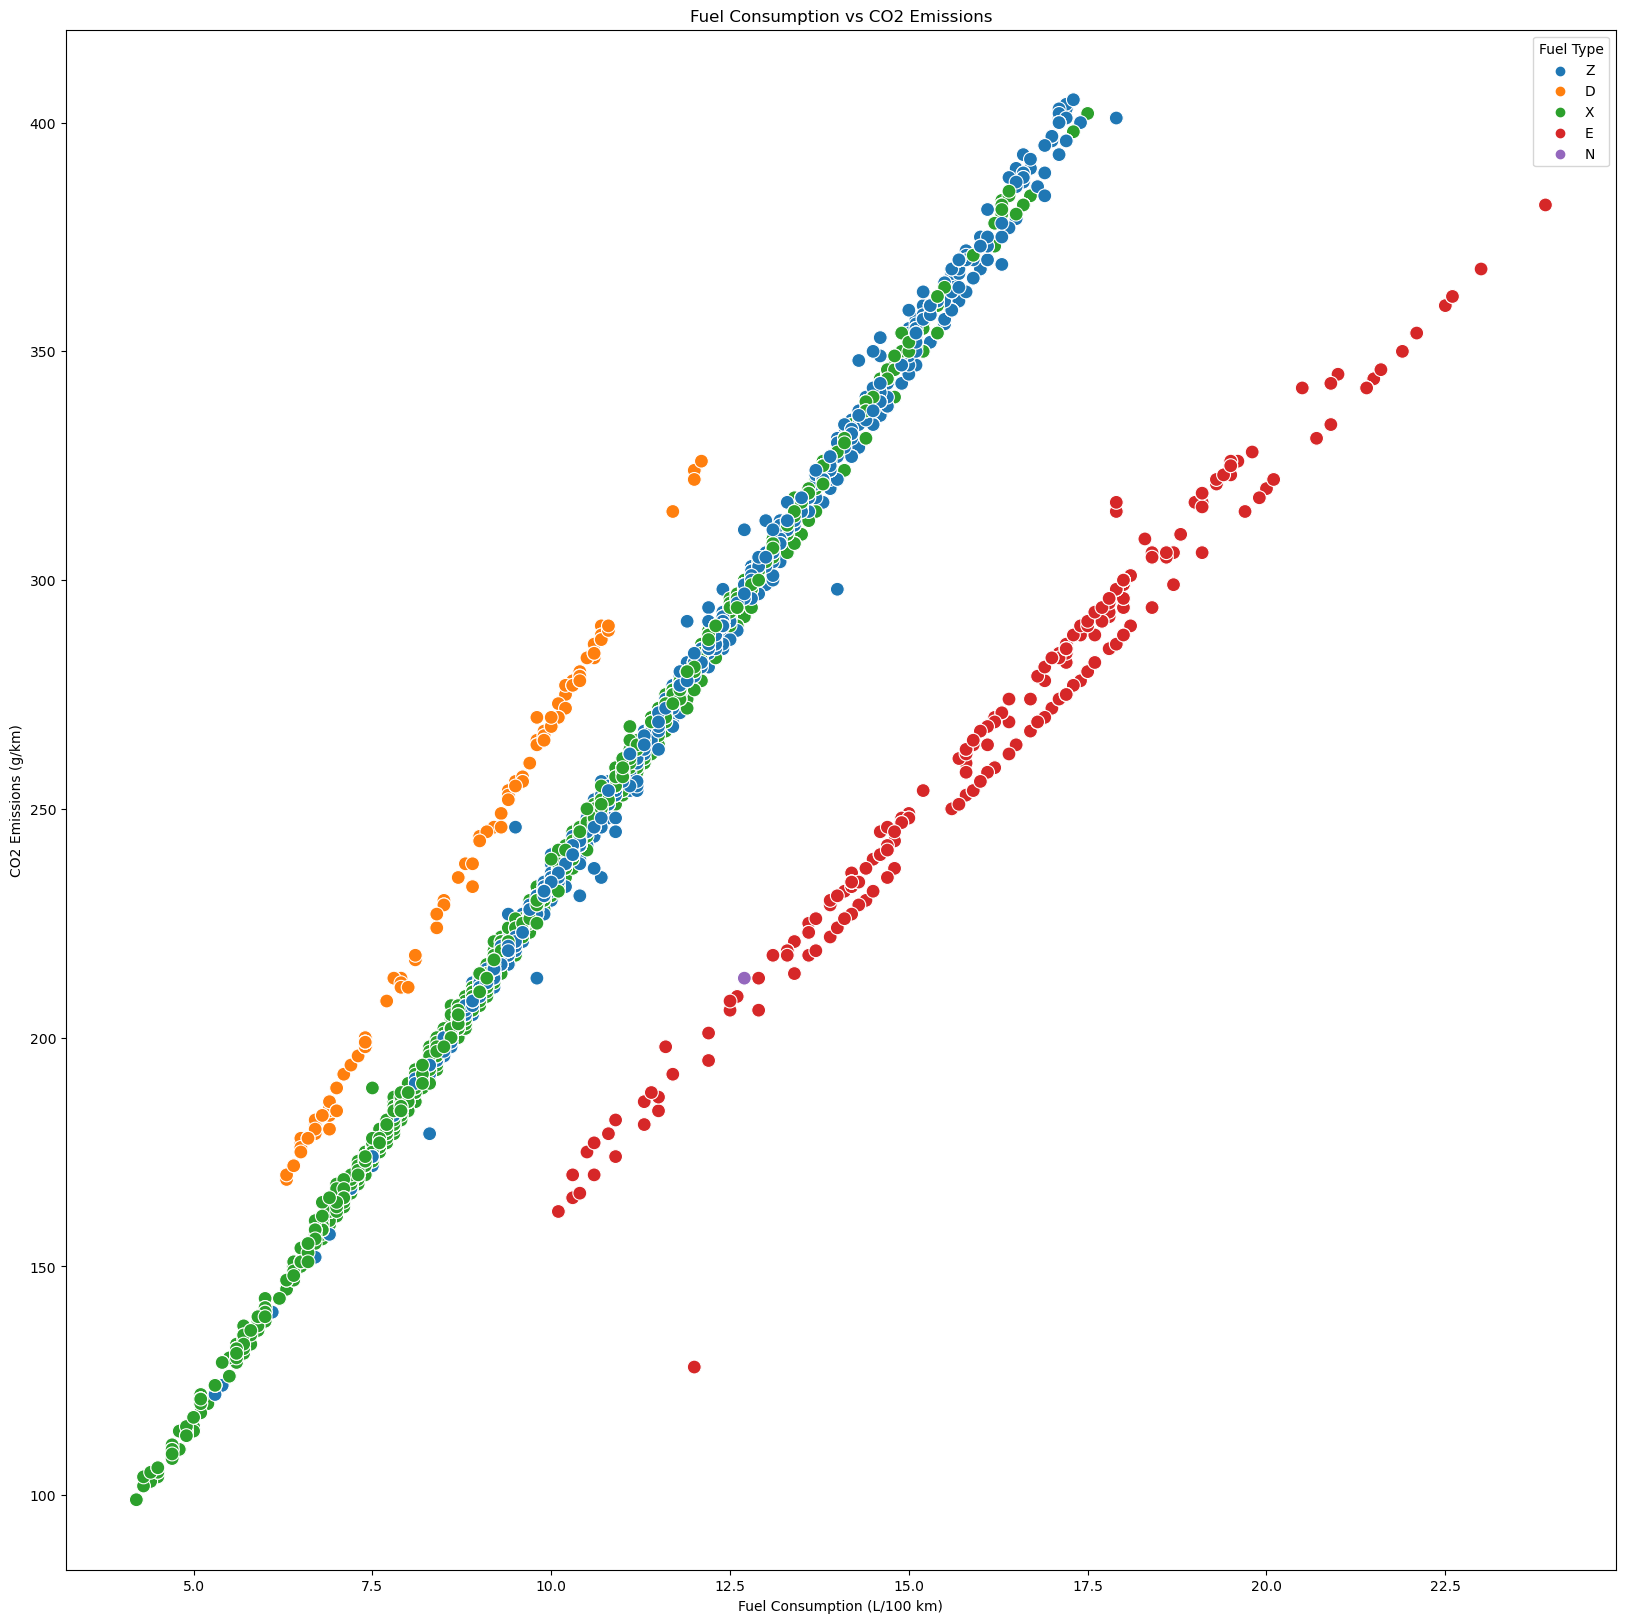

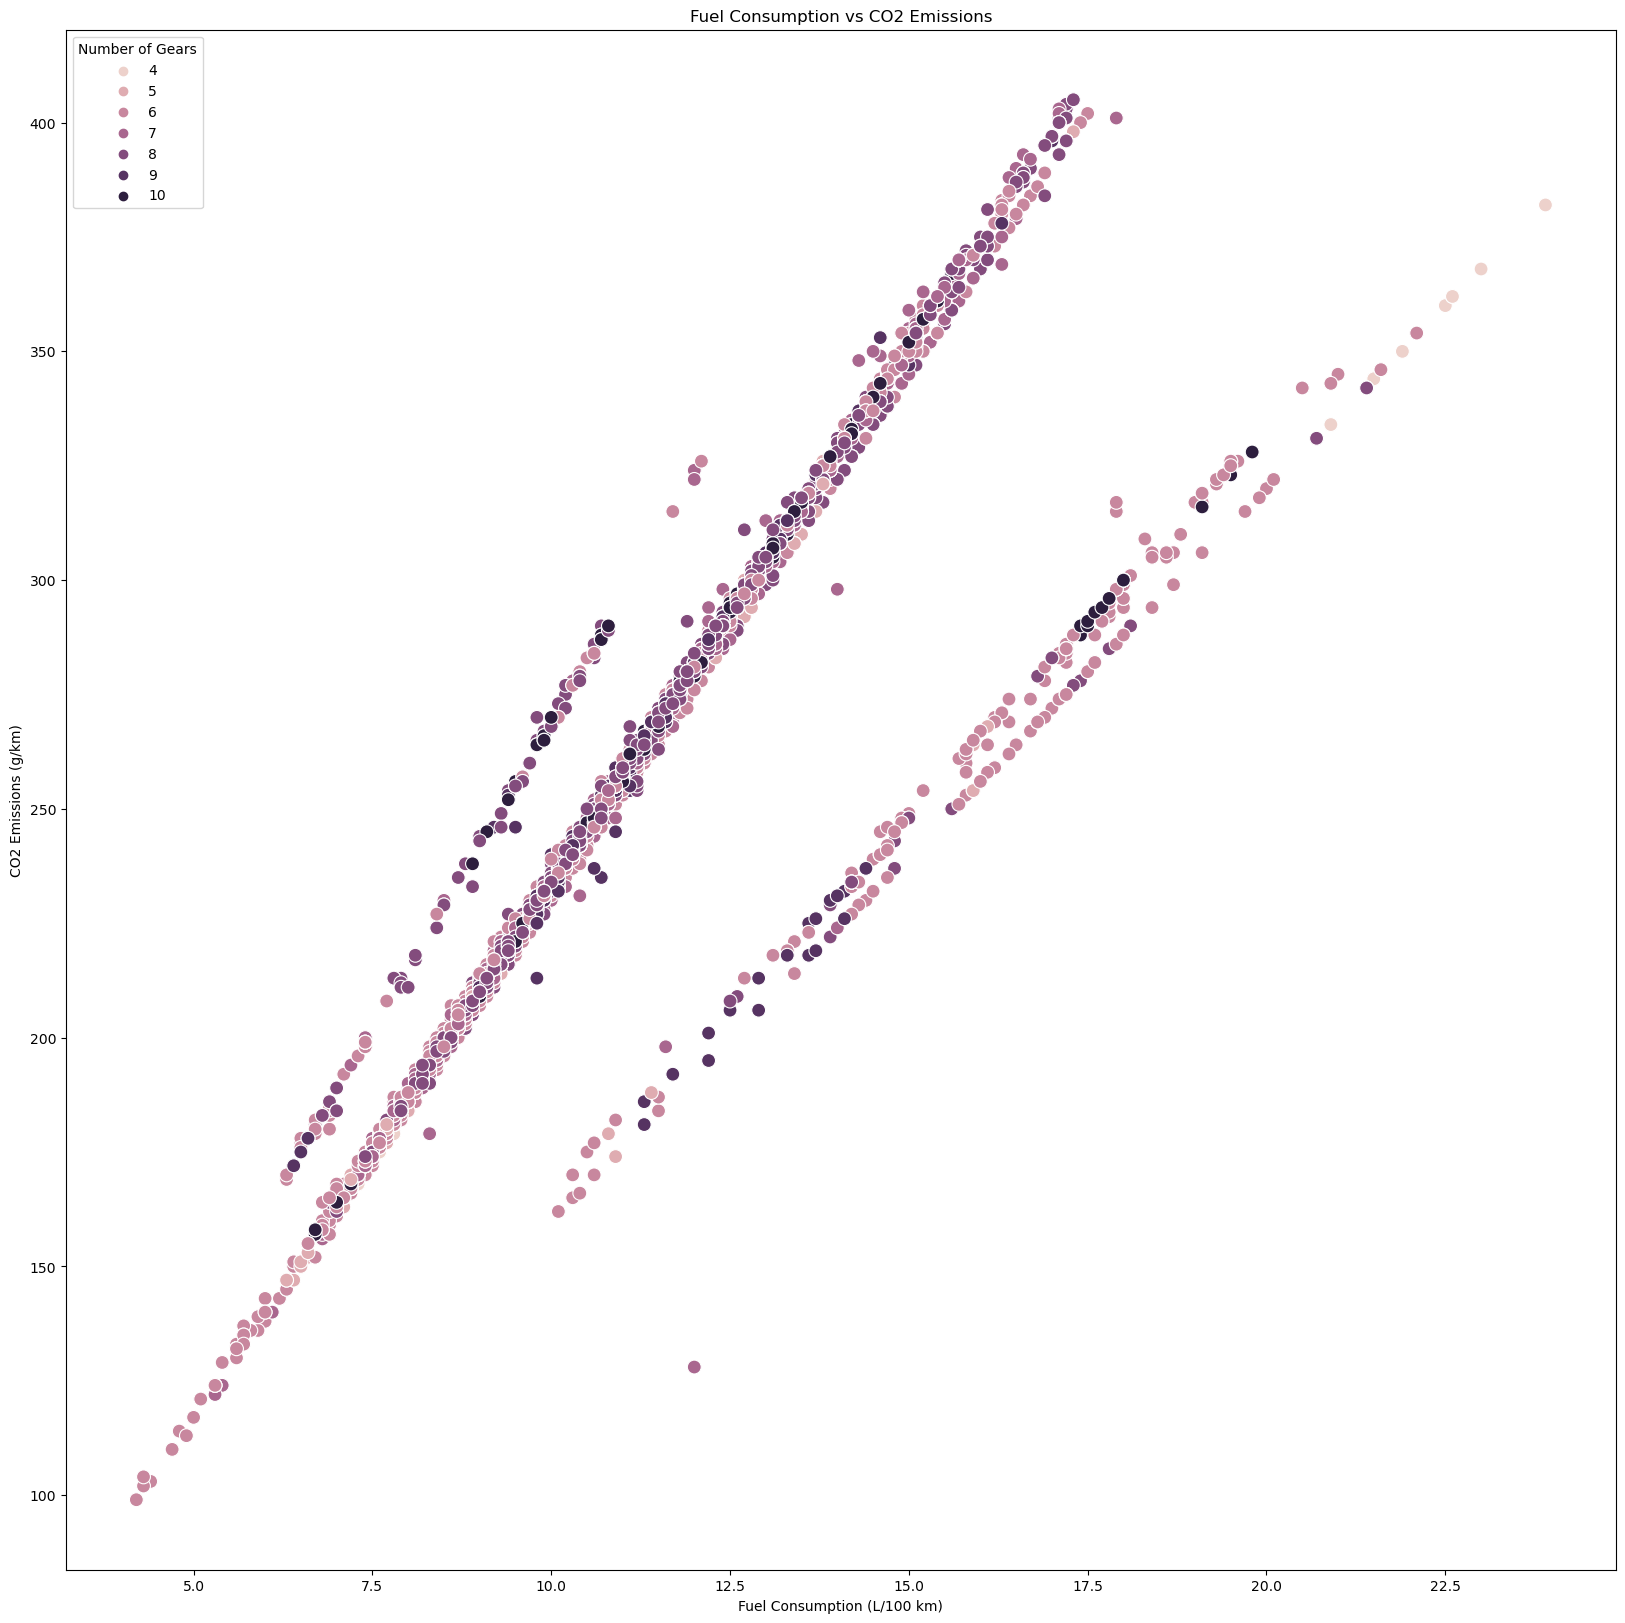

In [33]:
for var in catDf:
    plt.figure(figsize=(20, 20))
    sb.scatterplot(x = "Fuel Consumption Comb (L/100 km)", y = "CO2 Emissions(g/km)", data = df_filtered2, hue = var, s = 100)
    plt.title('Fuel Consumption vs CO2 Emissions')
    plt.xlabel('Fuel Consumption (L/100 km)')
    plt.ylabel('CO2 Emissions (g/km)')
    plt.show()

From the pair plots, we can observe clear clusters in the pair plot between CO2 Emissions and Fuel Consumption with the hue of Fuel Type. This suggests that Fuel Type may be a significant factor influencing the relationship between CO2 Emissions and Fuel Consumption. In general, for the same amount of Fuel Consumption, Disel(D) vehicles emits the most CO2 while Ethanol(E) vehicles emits the least CO2. 

However, there are no clear clusters between regular gasoline(X) vehicles, premium gasoline(Z) vehicles and Natural Gas(N) vehicles. The plot points for these Fuel Types are clustered together between Disel(D) vehicles and Ethanol(E) vehicles.

Another observation can be made in the pair plot between CO2 Emissions and Fuel Consumption with the hue of Cylinders. Plot points of lighter shade indicating vehicles with lower number of cylinders generally has lower Fuel Consumption and lower CO2 Emissions. Plot points of darker shade indicating vehicles with higher number of cylinder generally has greater Fuel Consumption and Greater CO2 Emission. This is in line with what was seen in the boxplots where there is a general increasing trend of CO2 Emissions as number of cylinders increases. 

In [28]:
df_filtered2.to_csv('CO2 Emissions_Canada_removed_outliers.csv')